In [1]:
!pip install pandas_datareader --upgrade

     |████████████████████████████████| 109 kB 8.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


### ***Interpolation***

One common use of modeling is interpolation to determine a value "inside" or "in between" the measured data points. In this exercise, you will make a prediction for the value of the dependent variable `distances` for a given independent variable `times` that falls "in between" two measurements from a road trip, where the `distances` are those traveled for the given elapse `times`.

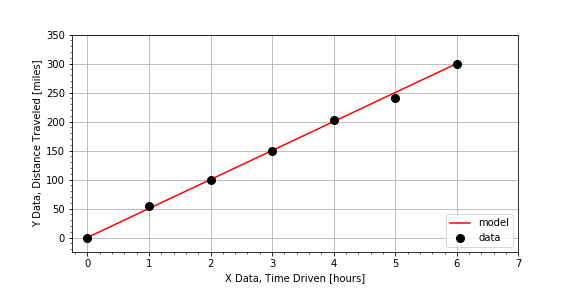

* Inspect the predefined data arrays, `times` and `distances`, and the preloaded plot.

* Based on your rough inspection, estimate the `distance_traveled` away from the starting position as of `elapse_time` = `2.5` hours.

* Assign your answer to `distance_traveled`.

In [1]:
import numpy as np

times = np.array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.])
distances = np.array([   0.        ,   44.04512153,  107.16353484,  148.43674052,
        196.39705633,  254.4358147 ,  300.        ])

# Compute the total change in distance and change in time
total_distance = distances[-1] - distances[0]
total_time     = times[-1]     - times[0]

# Estimate the slope of the data from the ratio of the changes
average_speed = total_distance / total_time

# Predict the distance traveled for a time not measured
elapse_time = 2.5
distance_traveled = average_speed * elapse_time
print("The distance traveled is {}".format(distance_traveled))

The distance traveled is 125.0


Notice that the answer distance is 'inside' that range of data values, so, less than the max(distances) but greater than the min(distances)

### ***Extrapolation***

Another common use of modeling is extrapolation to estimate data values "outside" or "beyond" the range (min and max values of time) of the measured data. In this exercise, we have measured distances for times 0 through 5 hours, but we are interested in estimating how far we'd go in 8 hours. Using the same data set from the previous exercise, we have prepared a linear model `distance = model(time)`. Use that `model()` to make a prediction about the distance traveled for a time much larger than the other times in the measurements.

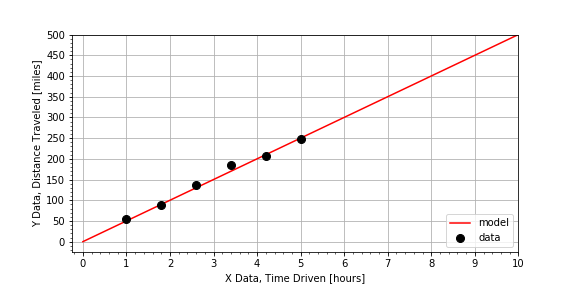

* Use `distance = model(time)` to extrapolate beyond the measured data to `time=8` hours.

* Print the distance predicted and then check whether it is less than or equal to `400`.

* If your car can travel, at most, 400 miles on a full tank, and it takes 8 hours to drive home, will you make it without refilling? You should have `answer=True` if you'll make it, or `answer=False` if you will run out of gas.

In [2]:
import numpy as np 

def model(time, a0=0, a1=50):
    distance = a0 + (a1*time)
    return distance

# Select a time not measured.
time = 8

# Use the model to compute a predicted distance for that time.
distance = model(8)

# Inspect the value of the predicted distance traveled.
print(distance)

# Determine if you will make it without refueling.
answer = (distance <= 400)
print(answer)

400
True


Notice that the car can travel just to the range limit of 400 miles, so you'd run out of gas just as you completed the trip.

### ***Estimating Relationships***

Another common application of modeling is to compare two data sets by building models for each, and then comparing the models. In this exercise, you are given data for a road trip two cars took together. The cars stopped for gas every 50 miles, but each car did not need to fill up the same amount, because the cars do not have the same fuel efficiency (MPG). Complete the function `efficiency_model(miles, gallons)` to estimate efficiency as average miles traveled per gallons of fuel consumed. Use the provided dictionaries `car1` and `car2`, which both have keys `car['miles']` and `car['gallons']`.

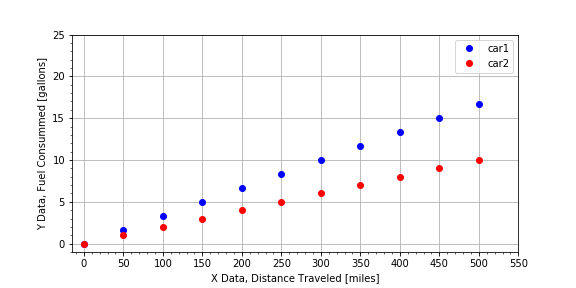context figure

* Complete the function definition for `efficiency_model(miles, gallons)`.

* Use the function to compute the efficiency of the provided cars (dicts `car1`, `car2`).

* Store your answers as `car1['mpg']` and `car2['mpg']`.

* Complete the following logic statement to print which car (if either) has the best efficiency.

car2 is the best


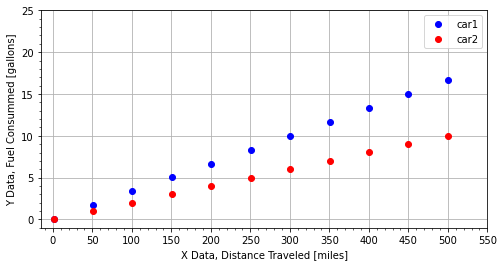

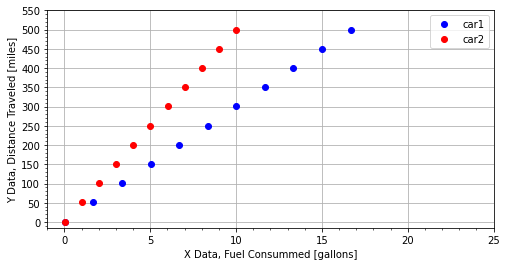

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator 


def plot_gpm(x1, y1, x2, y2):
    """
    Purpose:
        Plot data for both cars, with distance traveled on x-axis, fuel consummed on y-axis
    Args:
        x1 (np.ndarray): car1, distance traveled, in units of miles
        y1 (np.ndarray): car1, fuel consummed, in units of gallons
        x2 (np.ndarray): car2, distance traveled, in units of miles
        y2 (np.ndarray): car2, fuel consummed, in units of gallons
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    fig, axis = plt.subplots(figsize=(8,4))
    axis.plot(x1, y1,  label='car1',  color='blue', linestyle=" ",  marker="o")
    axis.plot(x2, y2,  label='car2',  color='red', linestyle=" ",  marker="o")
    axis.set_ylabel("Y Data, Fuel Consummed [gallons]")
    axis.set_xlabel("X Data, Distance Traveled [miles]")
    axis.grid(True)
    ymajorLocator = MultipleLocator(5.0)
    yminorLocator = MultipleLocator(1.0)
    axis.yaxis.set_major_locator(ymajorLocator)
    axis.yaxis.set_minor_locator(yminorLocator)
    xmajorLocator = MultipleLocator(50.0)
    xminorLocator = MultipleLocator(10.0)
    axis.xaxis.set_major_locator(xmajorLocator)
    axis.xaxis.set_minor_locator(xminorLocator)
    axis.set_xlim([-15, 550])
    axis.set_ylim([-1, 25])
    axis.legend()
    

def plot_mpg(x1, y1, x2, y2):
    """
    Purpose:
        Plot data for both cars, but reversing the x,y axes as compared to plot_gpm()
        so now, fuel consummed is on the x-axis, distance traveled is on the y-axis
    Args:
        x1 (np.ndarray): car1, fuel consummed, in units of gallons
        y1 (np.ndarray): car1, distance traveled, in units of miles
        x2 (np.ndarray): car2, fuel consummed, in units of gallons
        y2 (np.ndarray): car2, distance traveled, in units of miles
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    fig, axis = plt.subplots(figsize=(8,4))
    axis.plot(x1, y1,  label='car1',  color='blue', linestyle=" ",  marker="o")
    axis.plot(x2, y2,  label='car2',  color='red', linestyle=" ",  marker="o")
    axis.set_xlabel("X Data, Fuel Consummed [gallons]")
    axis.set_ylabel("Y Data, Distance Traveled [miles]")
    axis.grid(True)
    xmajorLocator = MultipleLocator(5.0)
    xminorLocator = MultipleLocator(1.0)
    axis.xaxis.set_major_locator(xmajorLocator)
    axis.xaxis.set_minor_locator(xminorLocator)
    ymajorLocator = MultipleLocator(50.0)
    yminorLocator = MultipleLocator(10.0)
    axis.yaxis.set_major_locator(ymajorLocator)
    axis.yaxis.set_minor_locator(yminorLocator)
    axis.set_ylim([-15, 550])
    axis.set_xlim([-1, 25])
    axis.legend()
    

# Complete the function to model the efficiency.
def efficiency_model(miles, gallons):
    return np.mean(miles / gallons)
car1 = {'gallons': np.array([  0.03333333,   1.69666667,   3.36      ,   5.02333333,
          6.68666667,   8.35      ,  10.01333333,  11.67666667,
         13.34      ,  15.00333333,  16.66666667]),
 'miles': np.array([   1. ,   50.9,  100.8,  150.7,  200.6,  250.5,  300.4,  350.3,
         400.2,  450.1,  500. ])}

car2 = {'gallons': np.array([  0.02 ,   1.018,   2.016,   3.014,   4.012,   5.01 ,   6.008,
          7.006,   8.004,   9.002,  10.   ]),
 'miles': np.array([   1. ,   50.9,  100.8,  150.7,  200.6,  250.5,  300.4,  350.3,
         400.2,  450.1,  500. ])}

# Use the function to estimate the efficiency for each car.
car1['mpg'] = efficiency_model(car1['miles'], car1['gallons'] )
car2['mpg'] = efficiency_model(car2['miles'], car2['gallons'] )

# Finish the logic statement to compare the car efficiencies.
if car1['mpg'] > car2['mpg'] :
    print('car1 is the best')
elif car1['mpg'] < car2['mpg'] :
    print('car2 is the best')
else:
    print('the cars have the same efficiency')

plot_gpm(car1['miles'], car1['gallons'], car2['miles'], car2['gallons'])
plot_mpg(car1['gallons'], car1['miles'], car2['gallons'], car2['miles'])

Notice the original plot that visualized the raw data was `plotgpm()`, and the slope is 1/MPG and so car1 is steeper than car2, but if you call `plotmpg(gallons, miles)` the slope is MPG, and so car2 has a steeper slope than car1.

### ***Plotting the Data***

Everything in python is an object, even modules. Your goal in this exercise is to review the use of the object oriented interfaces to the python library matplotlib in order to visualize measured data in a more flexible and extendable work flow. The general plotting work flow looks like this:

```
import matplotlib.pyplot as plt 
fig, axis = plt.subplots()
axis.plot(x, y, color="green", linestyle="--", marker="s")
plt.show()
```
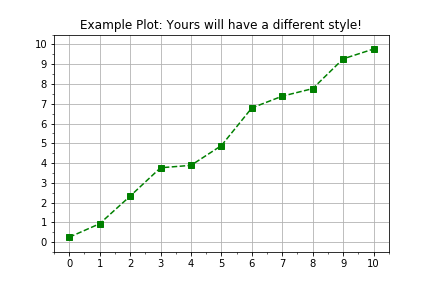context figure


* Use **`plt.subplots()`** to create figure and axis objects.

* Data have been provided in two predefined numpy arrays, `times` and `distances`.

* Use `axis.plot()` to plot times on the horizontal and distances on the vertical.

* Use the input key word args `linestyle=" "`, `marker="o"`, and `color="red"` when calling `axis.plot()`.

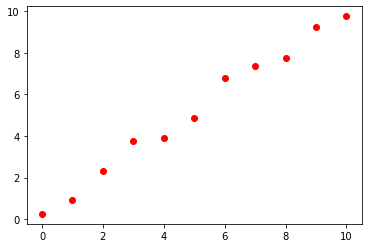

In [12]:
import numpy as np
import matplotlib.pyplot as plt

times = np.array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])
distances = np.array([ 0.24835708,  0.93086785,  2.32384427,  3.76151493,  3.88292331,
        4.88293152,  6.78960641,  7.38371736,  7.76526281,  9.27128002,
        9.76829115])

# Create figure and axis objects using subplots()
fig, axis = plt.subplots()

# Plot line using the axis.plot() method
line = axis.plot(times , distances , linestyle=" ", marker="o", color="red")

# Use the plt.show() method to display the figure
plt.show()

Notice how `linestyle=' '` means no line at all, just markers. Also note that your plot style is different than the context figure.  

### ***Plotting the Model on the Data***

Continuing with the same measured data from the previous exercise, your goal is to use a predefined `model()` and measured data `times` and `measured_distances` to compute modeled distances, and then plot both measured and modeled data on the same axis.

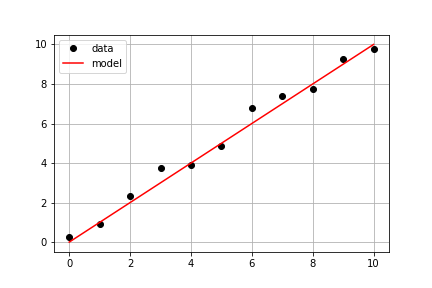

* Use `model_distances = model(times, measured_distances)` to compute the modeled values.

* Use `plt.subplots()` to create figure and axis objects.

* Use `axis.plot()` to plot `times` vs `measured_distances` with options `linestyle=" "`, `marker="o"`, `color="black"`.

* Use `axis.plot()` to also plot `times` vs `model_distances` with options `linestyle="-"`, `color="red"`.

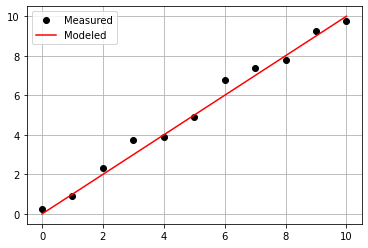

In [13]:
import numpy as np
import matplotlib.pyplot as plt

times = np.array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])
measured_distances = np.array([ 0.24835708,  0.93086785,  2.32384427,  3.76151493,  3.88292331,
        4.88293152,  6.78960641,  7.38371736,  7.76526281,  9.27128002,
        9.76829115])

def model(x, y, a0=0, a1=1):
    ym = a0 + (a1*x)
    return ym

# Pass times and measured distances into model
model_distances = model(times, measured_distances)

# Create figure and axis objects and call axis.plot() twice to plot data and model distances versus times
fig, axis = plt.subplots()
axis.plot(times, measured_distances, linestyle=" ", marker="o", color="black", label="Measured")
axis.plot(times, model_distances, linestyle="-", marker=None, color="red", label="Modeled")

# Add grid lines and a legend to your plot, and then show to display
axis.grid(True)
axis.legend(loc="best")
plt.show()

`None` is a special object that is often used as a place-holder to be replaced by default values, so `linestyle=None` does not mean no line, it means the default which is a solid line style, whereas `marker=None` triggers the default marker, which happens to be no marker at all. If you use `color=None`, the resulting color will be blue, the default line color for matplotlib.

### ***Visually Estimating the Slope & Intercept***

Given some measured data, your goal is to guess values for slope and intercept, pass them into the model, and adjust your guess until the resulting model fits the data. Use the provided data `xd`, `yd`, and the provided function `model()` to create model predictions. Compare the predictions and data using the provided `plot_data_and_model()`.

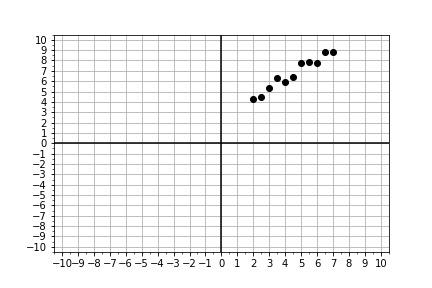

* Inspect the chart above, and provide preliminary estimates of `trial_slope` and `trial_intercept`. These can be adjusted later in the exercise.

* Use the predefined function `xm`, `ym` = `model(intercept, slope)` to generate model predictions.

* Use the provided function `fig = plot_data_and_model(xd, yd, xm, ym)` to plot the measured data (`xd`, `yd`) and the modeled predictions (`xm`, `ym`) together.

* If the model does not fit the data, try different values for `trial_slope` and `trial_intercept` and rerun your code.

* Repeat until you believe you have the best values, and then assign them to `final_slope` and `final_intercept`.

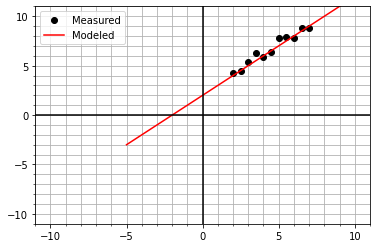

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

xd = np.array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ])
yd = np.array([ 4.24835708,  4.43086785,  5.32384427,  6.26151493,  5.88292331,
        6.38293152,  7.78960641,  7.88371736,  7.76526281,  8.77128002,
        8.76829115])

def model(a0=2, a1=1):
    xm = np.linspace(-5, 15, 41)
    ym = a0 + (a1*xm)
    return xm, ym

def plot_data_and_model(xd, yd, xm, ym):
    fig, axis = plt.subplots()
    axis.plot(xd, yd, color="black", linestyle=" ", marker="o", label="Measured")
    axis.plot(xm, ym, color="red", linestyle="-", marker=None, label="Modeled")
    axis.axvline(0, color='black')
    axis.axhline(0, color='black')
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_xlim([-11, 11])
    axis.set_ylim([-11, 11])
    axis.grid(True, which="both")
    axis.legend(loc=2)
    return fig

# Look at the plot data and guess initial trial values
trial_slope = 1
trial_intercept = 2

# input thoses guesses into the model function to compute the model values.
xm, ym = model(trial_intercept, trial_slope)

# Compare your model to the data with the plot function
fig = plot_data_and_model(xd, yd, xm, ym)
plt.show()

# Repeat the steps above until your slope and intercept guess makes the model line up with the data.
final_slope = 1
final_intercept = 2



### ***Mean, Deviation, & Standard Deviation***

The mean describes the center of the data. The standard deviation describes the spread of the data. But to compare two variables, it is convenient to normalize both. In this exercise, you are provided with two arrays of data, which are highly correlated, and you will compute and visualize the normalized deviations of each array.

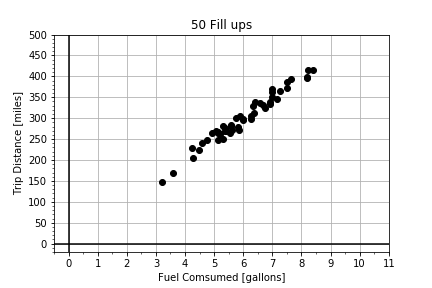

* Compute the deviations `dx` and `dy`.
* Compute the normalized deviations `zx` and `zy`.
* Call `plot_cdfs()` to see how both the raw and the normalized data compares.

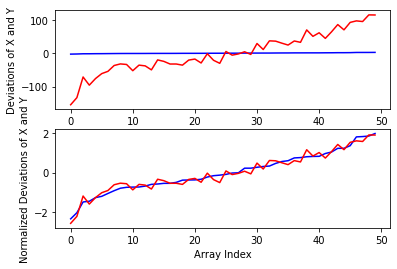

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import array

x = array([ 3.20141089,  3.57332076,  4.2284669 ,  4.27233051,  4.49370529,
        4.5713193 ,  4.74611933,  4.9143694 ,  5.06416613,  5.12046366,
        5.1332596 ,  5.1382451 ,  5.19463348,  5.30012277,  5.32111385,
        5.361098  ,  5.3622485 ,  5.42139975,  5.55601804,  5.56564872,
        5.57108737,  5.60910021,  5.74438063,  5.82636432,  5.85993128,
        5.90529103,  5.98816951,  6.00284592,  6.2829785 ,  6.28362732,
        6.33858905,  6.3861864 ,  6.41291216,  6.57380586,  6.68822271,
        6.73736858,  6.9071052 ,  6.92746243,  6.97873601,  6.99734545,
        7.0040539 ,  7.17582904,  7.26593626,  7.49073203,  7.49138963,
        7.65143654,  8.18678609,  8.20593008,  8.23814334,  8.39236527])

y = array([ 146.48264883,  167.75876162,  229.73232314,  205.23686657,
        224.99693822,  239.79378267,  246.65838372,  264.14477475,
        268.91257002,  267.25180588,  248.54953839,  265.25831322,
        263.03153004,  251.08035094,  280.93733241,  276.53088378,
        268.59007072,  268.62252076,  265.21874   ,  280.37743899,
        283.47297931,  271.72788298,  299.42217399,  279.79758387,
        270.70401032,  306.18168601,  295.17313188,  298.81898515,
        305.35499931,  297.3187572 ,  330.10944498,  312.07619563,
        338.08560914,  337.16702908,  331.10617501,  325.46645358,
        337.66440893,  333.64162871,  370.85149057,  351.59390525,
        362.27985309,  345.48425572,  365.1976818 ,  386.90415177,
        371.05186831,  393.39852867,  397.95134137,  395.98005292,
        415.89087335,  415.63691073])

def plot_cdfs(dx, dy, zx, xy):
    array_index = list(range(len(x)))
    fig, axes = plt.subplots(nrows=2, ncols=1)
    axes[0].plot(array_index, dx, color="blue")
    axes[0].plot(array_index, dy, color="red")
    axes[0].set_ylabel("Deviations of X and Y")
    axes[1].plot(array_index, zx, color="blue")
    axes[1].plot(array_index, zy, color="red")
    axes[1].set_ylabel("Normalized Deviations of X and Y")
    axes[1].set_xlabel("Array Index")
    plt.show()

# Compute the deviations by subtracting the mean offset
dx = x - np.mean(x)
dy = y - np.mean(y)

# Normalize the data by dividing the deviations by the standard deviation
zx = dx / np.std(x)
zy = dy / np.std(y)

# Plot comparisons of the raw data and the normalized data
fig = plot_cdfs(dx, dy, zx, zy)

Notice how hard it is to compare dx and dy, versus comparing the normalized zx and zy.

### ***Covariance vs Correlation***

Covariance is a measure of whether two variables change ("vary") together. It is calculated by computing the products, point-by-point, of the deviations seen in the previous exercise, `dx[n]*dy[n]`, and then finding the average of all those products.

Correlation is in essence 

* ***the normalized covariance.***

In this exercise, you are provided with two arrays of data, which are highly correlated, and you will visualize and compute both the covariance and the correlation.

* Compute the deviations, `dx` and `dy` by subtracting the mean, using `np.mean()`, and compute covariance as the mean of their product `dx*dy`.

* Compute the normalize deviations, `zx` and `zy`, by dividing by the standard deviation, using `np.std()`, and compute the correlation as the mean of their product, `zx*zy`.

* Use `plot_normalized_deviations(zx, zy)` to plot the product of the normalized deviations and visually check it against the correlation value.

Covariance:  69.67981827138166
Correlation:  0.9824333697735637


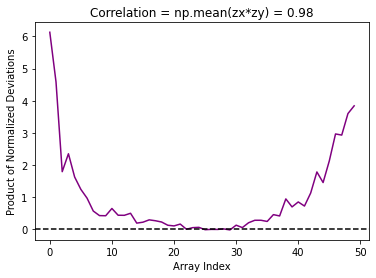

In [18]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import array

def plot_normalized_deviations(zx, zy):
    fig, axis = plt.subplots()
    lines = axis.plot(zx * zy, color="purple")
    axis.axhline(0, color="black", linestyle="--")
    axis.set_ylabel("Product of Normalized Deviations")
    axis.set_xlabel("Array Index")
    axis.set_title("Correlation = np.mean(zx*zy) = {:0.2f}".format(correlation))
    plt.show()

x = array([ 3.20141089,  3.57332076,  4.2284669 ,  4.27233051,  4.49370529,
        4.5713193 ,  4.74611933,  4.9143694 ,  5.06416613,  5.12046366,
        5.1332596 ,  5.1382451 ,  5.19463348,  5.30012277,  5.32111385,
        5.361098  ,  5.3622485 ,  5.42139975,  5.55601804,  5.56564872,
        5.57108737,  5.60910021,  5.74438063,  5.82636432,  5.85993128,
        5.90529103,  5.98816951,  6.00284592,  6.2829785 ,  6.28362732,
        6.33858905,  6.3861864 ,  6.41291216,  6.57380586,  6.68822271,
        6.73736858,  6.9071052 ,  6.92746243,  6.97873601,  6.99734545,
        7.0040539 ,  7.17582904,  7.26593626,  7.49073203,  7.49138963,
        7.65143654,  8.18678609,  8.20593008,  8.23814334,  8.39236527])

y = array([ 146.48264883,  167.75876162,  229.73232314,  205.23686657,
        224.99693822,  239.79378267,  246.65838372,  264.14477475,
        268.91257002,  267.25180588,  248.54953839,  265.25831322,
        263.03153004,  251.08035094,  280.93733241,  276.53088378,
        268.59007072,  268.62252076,  265.21874   ,  280.37743899,
        283.47297931,  271.72788298,  299.42217399,  279.79758387,
        270.70401032,  306.18168601,  295.17313188,  298.81898515,
        305.35499931,  297.3187572 ,  330.10944498,  312.07619563,
        338.08560914,  337.16702908,  331.10617501,  325.46645358,
        337.66440893,  333.64162871,  370.85149057,  351.59390525,
        362.27985309,  345.48425572,  365.1976818 ,  386.90415177,
        371.05186831,  393.39852867,  397.95134137,  395.98005292,
        415.89087335,  415.63691073])

# Compute the covariance from the deviations.
dx = x - np.mean(x)
dy = y - np.mean(y)
covariance = np.mean(dx * dy)
print("Covariance: ", covariance)

# Compute the correlation from the normalized deviations.
zx = dx / np.std(x)
zy = dy / np.std(y)
correlation = np.mean(zx * zy)
print("Correlation: ", correlation)

# Plot the normalized deviations for visual inspection. 
fig = plot_normalized_deviations(zx, zy)


Notice that you've plotted the `product of the normalized deviations`, and labeled the plot with the correlation, a single value that is the mean of that product. The product is always positive and the mean is typical of how the two vary together.

### ***Correlation Strength***\

Intuitively, we can look at the plots provided and "see" whether the two variables seem to "vary together".

* Data Set A: x and y change together and appear to have a strong relationship.
* Data Set B: there is a rough upward trend; x and y appear only loosely related.
* Data Set C: looks like random scatter; x an y do not appear to change together and are unrelated.

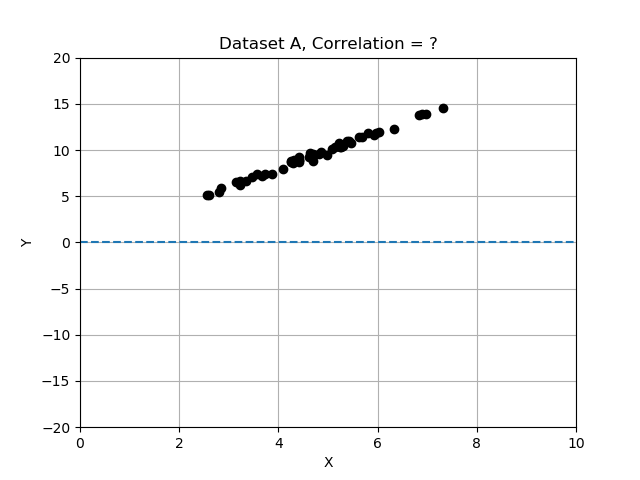

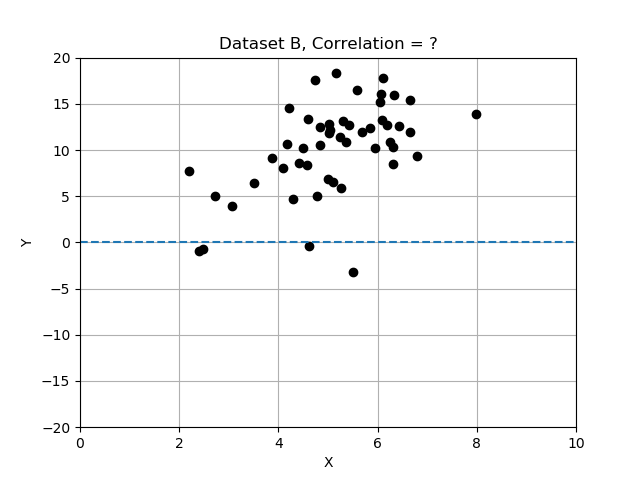

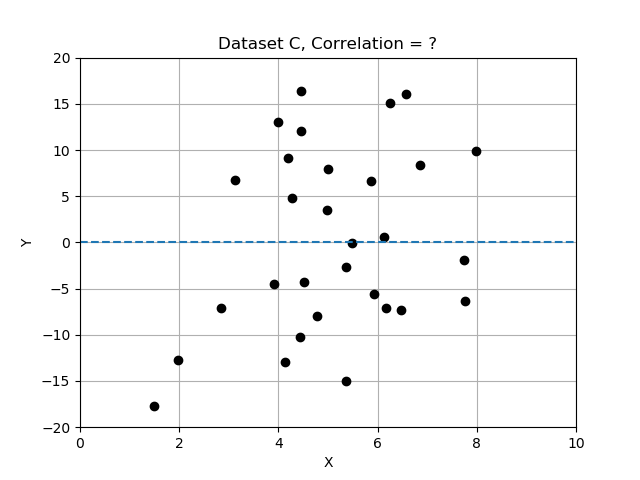

Recall that deviations differ from the mean, and we normalized by dividing the deviations by standard deviation. In this exercise you will compare the 3 data sets by computing correlation, and determining which data set has the most strongly correlated variables `x` and `y`. Use the provided data table `data_sets`, a dictionary of records, each having keys `'name'`, `'x'`, `'y'`, and `'correlation'`.


* Complete the function definition for `correlation()` using the mean of the products of the normalized deviations of `x` and `y`.

* Iterate over `data_sets`, computing and storing each correlation using `correlation(record['x'], record['y'])`.

* Run the code up until this point (i.e. the end of the `for` loop), and inspect the printout. Which dataset has the strongest correlation?

* Assign the name of the dataset (`data_sets['A'], data_sets['B']`, or `data_sets['C']`) with the strongest correlation to the variable `best_data`.

In [20]:
import numpy as np
from numpy import nan

data_sets = {'A': {'correlation': nan,
  'x': array([ 2.55041235,  2.60839969,  2.79619981,  2.84385271,  3.15184751,
          3.21906477,  3.23462037,  3.33976744,  3.47394544,  3.56125803,
          3.67786134,  3.7339611 ,  3.86496991,  4.10019474,  4.24786673,
          4.24920164,  4.29714059,  4.31952159,  4.41315702,  4.41783781,
          4.42072788,  4.42420154,  4.62362038,  4.63538281,  4.70730828,
          4.7073288 ,  4.71777962,  4.82716962,  4.85543965,  4.98312847,
          5.08441026,  5.13865324,  5.21421035,  5.24607654,  5.26107949,
          5.30245284,  5.39280917,  5.42952286,  5.46962252,  5.62089269,
          5.67820005,  5.80961067,  5.92308322,  5.95929341,  6.02818114,
          6.32140278,  6.83206096,  6.90378732,  6.97401602,  7.31534773]),
  'y': array([  5.18184568,   5.12052882,   5.42316911,   5.84062449,
           6.5614449 ,   6.67094956,   6.25943637,   6.60223178,
           7.03070673,   7.36640234,   7.23592912,   7.42150745,
           7.45335607,   7.90133782,   8.69886493,   8.83746328,
           8.57627865,   8.88992641,   8.91672304,   8.67439568,
           8.93180467,   9.23291221,   9.23828425,   9.66192654,
           8.75968029,   9.62013323,   9.45732102,   9.57958741,
           9.73381949,   9.46936471,  10.11390254,  10.36658462,
          10.79789421,  10.36258554,  10.32003559,  10.47946642,
          11.01446886,  10.9412335 ,  10.80680499,  11.37010224,
          11.3806695 ,  11.86138259,  11.67065318,  11.83667129,
          11.95833524,  12.27692683,  13.73815199,  13.87283846,
          13.9493104 ,  14.57204868])},
 'B': {'correlation': nan,
  'x': array([ 2.19664381,  2.406278  ,  2.47343147,  2.72871597,  3.06636806,
          3.51128038,  3.87855402,  4.09926408,  4.18003832,  4.20434562,
          4.29194259,  4.41336839,  4.50269971,  4.58240329,  4.59650649,
          4.60918513,  4.74669209,  4.77111432,  4.82900646,  4.84738553,
          5.00264796,  5.01962047,  5.02286149,  5.04517742,  5.09524948,
          5.15589119,  5.24177672,  5.26908573,  5.30974025,  5.36136493,
          5.42179707,  5.50681676,  5.58929395,  5.69179864,  5.84444261,
          5.94426748,  6.05209339,  6.07448552,  6.07964661,  6.10895368,
          6.19165516,  6.23993253,  6.30742282,  6.30947322,  6.32371148,
          6.43754466,  6.64768944,  6.65144774,  6.79088371,  7.98870064]),
  'y': array([  7.75732279,  -0.97068431,  -0.66103018,   5.05375913,
           3.93976632,   6.44408273,   9.17318937,   8.05647607,
          10.62302986,  14.59132646,   4.68693984,   8.54535728,
          10.23727485,   8.33081153,  13.32821592,  -0.38344428,
          17.61579867,   4.97170349,  10.50554646,  12.51365356,
           6.86355506,  11.88747988,  12.86263588,  12.18438671,
           6.48548172,  18.34315419,  11.39140361,   5.92753502,
          13.14739828,  10.8807806 ,  12.70116343,  -3.24043311,
          16.46301037,  11.99411949,  12.34700338,  10.16815219,
          15.17366173,  16.0886504 ,  13.24263662,  17.78585212,
          12.70267957,  10.88000673,   8.5034434 ,  10.28007359,
          15.91379868,  12.5473011 ,  11.91631483,  15.41604806,
           9.30581229,  13.92987605])},
 'C': {'correlation': nan,
  'x': array([ 1.50176362,  1.96665095,  2.78558362,  2.84041313,  3.11713161,
          3.21414912,  3.43264917,  3.64296175,  3.83020766,  3.90057957,
          3.9165745 ,  3.92280638,  3.99329185,  4.12515346,  4.15139231,
          4.2013725 ,  4.20281062,  4.27674969,  4.44502255,  4.45706091,
          4.46385921,  4.51137526,  4.68047579,  4.7829554 ,  4.8249141 ,
          4.88161379,  4.98521188,  5.00355739,  5.35372312,  5.35453415,
          5.42323631,  5.482733  ,  5.5161402 ,  5.71725733,  5.86027839,
          5.92171072,  6.13388149,  6.15932804,  6.22342001,  6.24668181,
          6.25506737,  6.46978631,  6.58242032,  6.86341504,  6.86423703,
          7.06429567,  7.73348261,  7.7574126 ,  7.79767917,  7.99045658]),
  'y': array([-17.70183793, -12.68730947,  33.47056284,  -7.0881775 ,
           6.7091949 ,  23.53735376,  21.11660059,  35.3641024 ,
          31.59072152,  24.91144186,  -4.53019043,  20.56341545,
          13.01493562, -12.96994045,  30.97956936,  21.31852956,
           9.13346253,   4.82402639, -10.28277321,  12.10650699,
          16.42274434,  -4.27572923,  27.95621636,  -7.98933795,
         -24.3197774 ,  26.39886103,   3.51656715,   7.99064142,
          -2.69282132, -14.98633586,  30.93027062,  -0.05643774,
          37.60752021,  24.35144564,   6.68442643,  -5.53101698,
           0.5483712 ,  -7.08171402,  45.84065377,  15.1244233 ,
          30.91342343,  -7.33806017,  16.06140272,  32.57262109,
           8.36830187,  30.62642269,  -1.88612137,  -6.30071951,
          21.66576814,   9.91409021])}}

# Complete the function that will compute correlation.
def correlation(x,y):
    x_dev = x - np.mean(x)
    y_dev = y - np.mean(y)
    x_norm = x_dev / np.std(x)
    y_norm = y_dev / np.std(y)
    return np.mean(x_norm * y_norm)

# Compute and store the correlation for each data set in the list.
for name, data in data_sets.items():
    data['correlation'] = correlation(data['x'], data['y'])
    print('data set {} has correlation {:.2f}'.format(name, data['correlation']))

# Assign the data set with the best correlation.
best_data = data_sets['A']

data set A has correlation 1.00
data set B has correlation 0.54
data set C has correlation 0.09


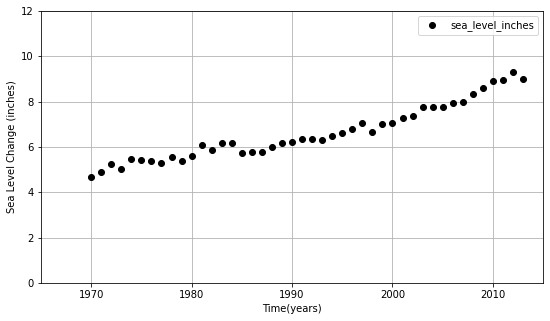

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd 

df = pd.read_csv('sea_level_data.csv', index_col='year')
fig, ax = plt.subplots(figsize=(9,5))
df.plot(ax=ax, marker='o', color='black', linestyle='none')
ax.grid()
ax.set_xlabel('Time(years)')
ax.set_ylabel('Sea Level Change (inches)')
ax.set_xlim([1965, 2015])
ax.set_ylim([0, 12])
plt.show()

# ***Zeroth Order***

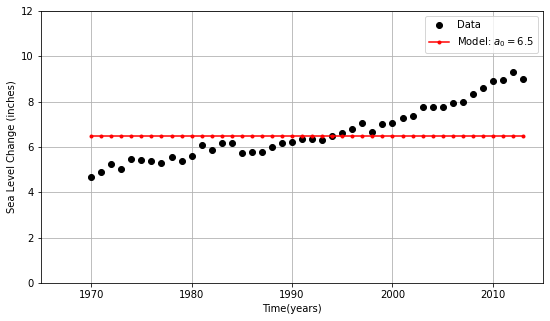

In [10]:
import numpy as np

fig, ax = plt.subplots(figsize=(9,5))
df.plot(ax=ax, marker='o', color='black', linestyle='none')
ax.grid()
ax.set_xlabel('Time(years)')
ax.set_ylabel('Sea Level Change (inches)')
ax.set_xlim([1965, 2015])
ax.set_ylim([0, 12])
ax.plot(np.linspace(1970, 2013, len(df)), [6.5]*len(df), marker='.', color='red')
plt.legend(('Data', r'Model: $a_0=6.5$'))
plt.show()

# ***First Order***

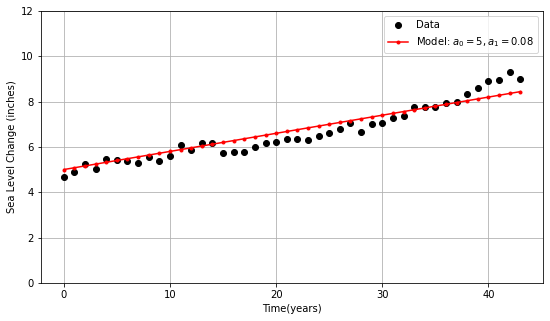

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('sea_level_data.csv')
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(df['sea_level_inches'], marker='o', color='black', linestyle='none')
ax.grid()
ax.set_xlabel('Time(years)')
ax.set_ylabel('Sea Level Change (inches)')
ax.set_ylim([0, 12])
ax.plot(df.index, [5]*len(df) + 0.08*df.index, marker='.', color='red')
plt.legend(('Data', r'Model: $a_0=5, a_1=0.08$'))
plt.show()

# ***Second Order***

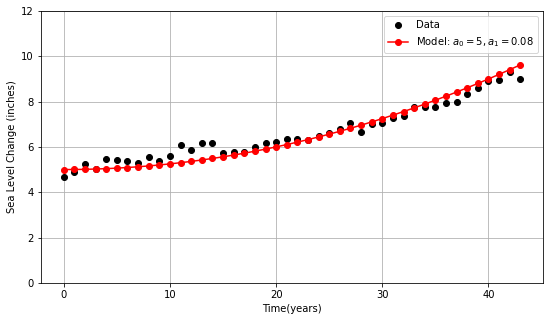

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('sea_level_data.csv')
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(df['sea_level_inches'], marker='o', color='black', linestyle='none')
ax.grid()
ax.set_xlabel('Time(years)')
ax.set_ylabel('Sea Level Change (inches)')
ax.set_ylim([0, 12])
ax.plot(df.index, [5]*len(df) + 0.0025*(df.index)**2, marker='o', color='red')
plt.legend(('Data', r'Model: $a_0=5, a_1=0.08$'))
plt.show()

# ***Over-fitting***

The above is overfit because if you add more data points, the model deviates a lot.

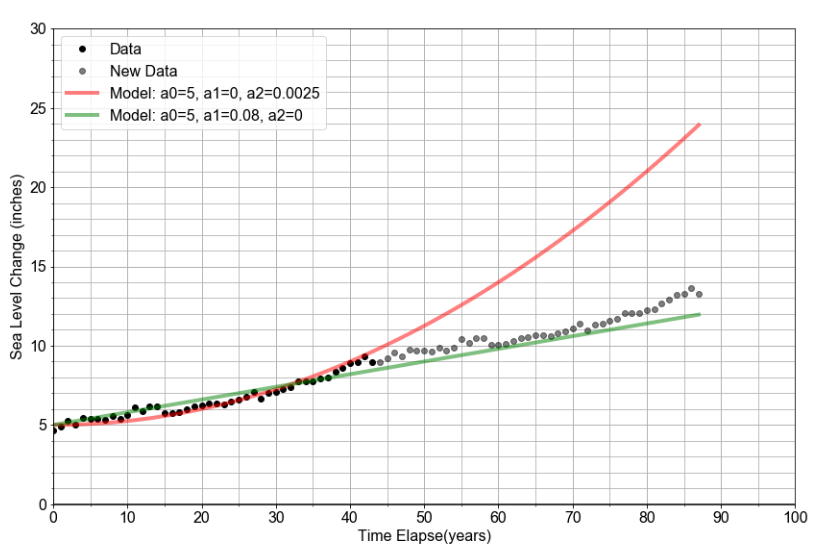

### ***Model Components***

Previously, you have been given a ***pre-defined*** model to work with. In this exercise, you will implement a model function that returns model values for `y`, computed from input `x` data, and any input coefficients for the "zero-th" order term `a0`, the "first-order" term `a1`, and a quadratic term `a2` of a model (see below).

$$y = a_0 + a_1 x + a_2 x^2$$ 

Recall that "first order" is linear, so we'll set the defaults for this general linear model with `a2=0`, but later, we will change this for comparison.


* Complete the function definition `model()` so it takes `x`, and default inputs `a0=3`, `a1=2`, `a2=0` as input, and returns `y`.

* Create an array of values `x` using the numpy method `np.linspace()`.

* Pass `x` into your `model()` without specifying `a0`, `a1`, `a2`, to get default predicted `y` values.

* Use the pre-defined `plot_prediction()` to see a plot of the resulting data `x` and `y`.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


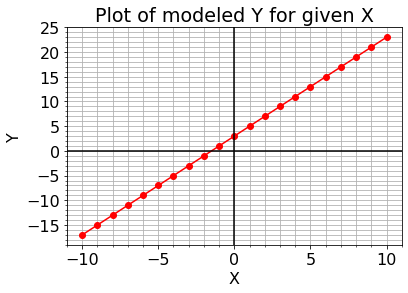

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator 

def plot_prediction(x, y):
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots()
    axis.plot(x, y, color="red", linestyle="-", marker="o")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_ylabel('Y')
    axis.set_xlabel('X')
    axis.set_title("Plot of modeled Y for given X")
    plt.show()

# Define the general model as a function
def model(x, a0=3, a1=2, a2=0):
    return a0 + (a1*x) + (a2*x**2)

# Generate array x, then predict y values for specific, non-default a0 and a1
x = np.linspace(-10, 10, 21)
y = model(x)

# Plot the results, y versus x
fig = plot_prediction(x, y)

Notice that we used `model()` to compute predicted values of `y` for given possibly measured values of `x`. The model takes the independent data and uses it to generate a model for the dependent variables corresponding values.

### ***Model Parameters***

Now that you've built a general model, let's "optimize" or "fit" it to a new (preloaded) measured data set, `xd`, `yd`, by finding the specific values for model parameters `a0`, `a1` for which the model data and the measured data line up on a plot.

This is an iterative visualization strategy, where we start with a guess for model parameters, pass them into the `model()`, over-plot the resulting modeled data on the measured data, and visually check that the line passes through the points. If it doesn't, we change the model parameters and try again.

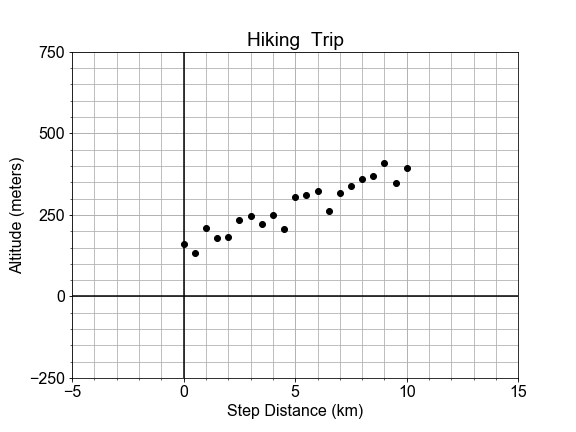

* Complete the function `plot_data_and_model(xd, yd, ym)`, passing `xd`, `yd` and `xd`, `ym` into the internal plotting calls.

* Compute model predictions using `ym = model()` by passing in both the data `xd` and the guessed model parameters `a0` and `a1`.

* Inspect the data provided above, and use this as a guide when you provide your first two estimates. You can come back and revise these estimates after reviewing how the line fits the data.

* Use `plot_data_and_model()` to plot `xd`, `yd`, and `ym` together.

* Change the values of `a0` and `a1` and repeat the previous 2 steps until the line passes through all the points.

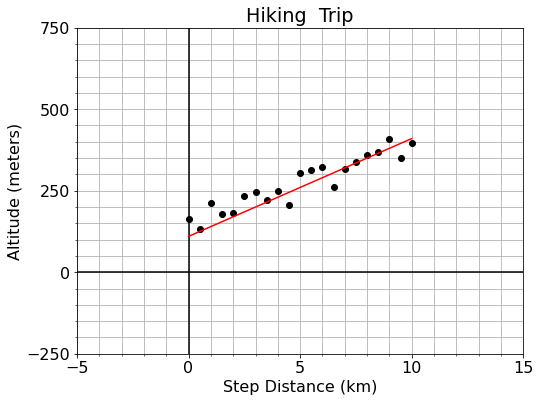

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator 
from numpy import array

xd = array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

yd = array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188])

def plot_data(x, y):
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,6))
    axis.plot(x, y, color="black", linestyle=" ", marker="o")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.set_ylim([-5*50, 15*50])
    axis.set_xlim([-5, 15])
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0*50))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0*50))
    axis.set_ylabel('Altitude (meters)')
    axis.set_xlabel('Step Distance (km)')
    axis.set_title("Hiking  Trip")
    return fig

def plot_data_with_model(xd, yd, ym):
    fig = plot_data(xd, yd)  # plot measured data
    fig.axes[0].plot(xd, ym, color='red')  # over-plot modeled data
    plt.show()
    return fig

# Select new model parameters a0, a1, and generate modeled `ym` from them.
a0 = 110
a1 = 30
ym = model(xd, a0, a1)

# Plot the resulting model to see whether it fits the data
fig = plot_data_with_model(xd, yd, ym)

Notice again that the measured x-axis data `xd` is used to generate the modeled y-axis data `ym` so to plot the model, you are plotting `ym` vs `xd`, which may seem counter-intuitive at first. But we are modeling the `y` response to a given `x`; we are not modeling `x`.

### ***Linear Proportionality***

Explore the conversion between the Fahrenheit and Celsius temperature scales as a demonstration of interpreting slope and intercept of a linear relationship within a physical context.

* Complete the function `temps_F = convert_scale(temps_C)` as a linear model where "x" is `temps_C` and "y" is `temps_F`.

* Compute the change in temperature in both scales by subtracting the freezing temperature from the boiling temperature.

* Compute the `slope` as the `change_in_F` divided by the `change_in_C`.

* Compute the `intercept` as the difference between the freezing points `freeze_F` and `freeze_C`.

* Use the predefined `plot_temperatures()` to plot the resulting model.

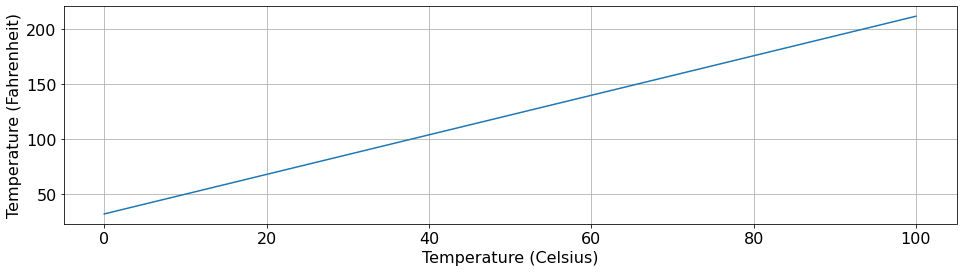

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_temperatures(temps_C, temps_F):
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(16,4))
    axis.plot(temps_C, temps_F)
    axis.set_xlabel("Temperature (Celsius)")
    axis.set_ylabel("Temperature (Fahrenheit)")
    axis.grid()
    plt.show()

# Complete the function to convert C to F
def convert_scale(temps_C):
    (freeze_C, boil_C) = (0, 100)
    (freeze_F, boil_F) = (32, 212)
    change_in_C = boil_C - freeze_C
    change_in_F = boil_F - freeze_F
    slope = change_in_F / change_in_C
    intercept = 32 - freeze_C
    temps_F = intercept + (slope * temps_C)
    return temps_F

# Use the convert function to compute values of F and plot them
temps_C = np.linspace(0, 100, 101)
temps_F = convert_scale(temps_C)
fig = plot_temperatures(temps_C, temps_F)

### ***Slope and Rates-of-Change***

Model the motion of a car driving  constant velocity by computing the average velocity over the entire trip. The linear relationship modeled is between the time elapsed and the distance traveled.

In this case, the model parameter `a1`, or slope, is approximated or "estimated", as the mean velocity, or put another way, the "rate-of-change" of the distance ("rise") divided by the time ("run").

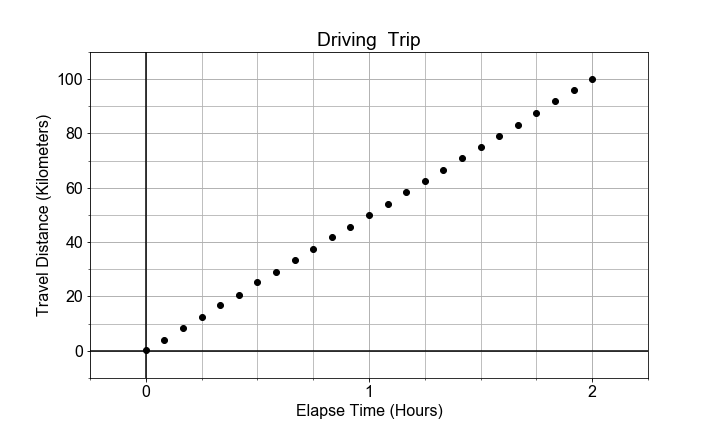

* Compute the the point-to-point differences of both the times and distances using **`np.diff()`**.

* Compute an array of velocities as the ratio of the `diff_distance` divided by `diff_times`.

* Compute the average and range of velocity values, using `numpy` methods `mean`, `max`, `min`.

* Plot the array of velocities to visualize the average and spread of the values.

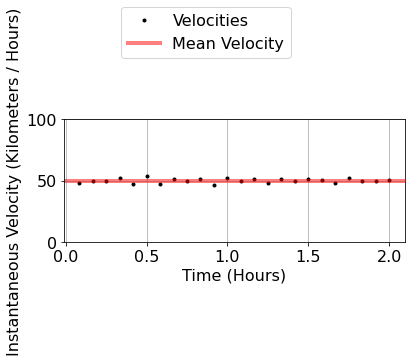

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator 
from numpy import array

distances = array([   0.13536211,    4.11568697,    8.28931902,   12.41058595,
         16.73878397,   20.64153844,   25.14540098,   29.10323276,
         33.35991992,   37.47921914,   41.78850899,   45.66165494,
         49.9731319 ,   54.13466214,   58.42781412,   62.40834239,
         66.65229765,   70.76017847,   75.00351781,   79.2152346 ,
         83.24161507,   87.59539364,   91.74179923,   95.87520786,
        100.07507133])

times = array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ])

def plot_velocity_timeseries(times, velocities):
    fig, axis = plt.subplots()
    axis.plot(times, velocities, linestyle=" ", marker=".", color='black', label='Velocities')
    axis.axhline(np.mean(velocities), color='red', alpha=0.5, lw=4, label='Mean Velocity')
    axis.grid(True, which="both")
    axis.set_ylabel("Instantaneous Velocity (Kilometers / Hours)")
    axis.set_xlabel("Time (Hours)")
    axis.set_ylim([0, 100])
    fig.tight_layout()
    fig.legend(loc='upper center')
    plt.show()

# Compute an array of velocities as the slope between each point
diff_distances = np.diff(distances)
diff_times = np.diff(times)
velocities = diff_distances / diff_times

# Chracterize the center and spread of the velocities
v_avg = np.mean(velocities)
v_max = np.max(velocities)
v_min = np.min(velocities)
v_range = v_max - v_min

# Plot the distribution of velocities
fig = plot_velocity_timeseries(times[1:], velocities)

### ***Intercept and Starting Points***


Use the preloaded pandas DataFrame `df`, with data columns `volumes` and `masses`, to build a linear model that relates the `masses` (y-data) to the `volumes` (x-data). The slope will be an estimate of the density (change in mass / change in volume) of the solution, and the intercept will be an estimate of the empty container weight (mass when volume=0).

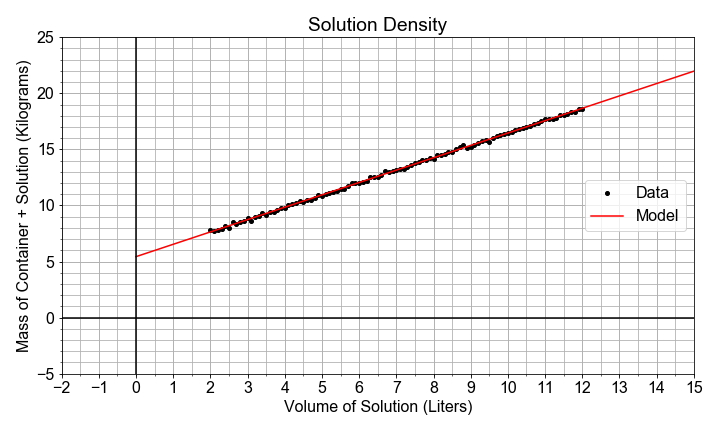

* Import ols() from statsmodels and use it to build a model fit to the `data=df` with `formula = "masses ~ volumes"`.

* Extract the intercept `a0` and the slope `a1` with **`.params['Intercept']`** and **`.params['volumes']`**, respectively.

* Print `a0` and `a1` with physically meaningful names.

* Print `model_fit()` and look for values matching the ones found above; look for row labels `Intercept`, `volumes`, and a column label `coef`.

In [19]:
from statsmodels.formula.api import ols
import pandas as pd

df = pd.read_csv('solution_data.csv')

model_fit = ols(formula="masses ~ volumes", data=df)
model_fit = model_fit.fit()

# Extract the model parameter values, and assign them to a0, a1
a0 = model_fit.params['Intercept']
a1 = model_fit.params['volumes']

# Print model parameter values with meaningful names, and compare to summary()
print( "container_mass   = {:0.4f}".format(a0) )
print( "solution_density = {:0.4f}".format(a1) )
print( model_fit.summary() )

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


container_mass   = 5.4349
solution_density = 1.1029
                            OLS Regression Results                            
Dep. Variable:                 masses   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.328e+05
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          1.19e-156
Time:                        20:52:44   Log-Likelihood:                 102.39
No. Observations:                 101   AIC:                            -200.8
Df Residuals:                      99   BIC:                            -195.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


### ***Residual Sum of the Squares***

In a previous exercise, we saw that the altitude along a hiking trail was roughly fit by a linear model, and we introduced the concept of differences between the model and the data as a measure of model goodness.

In this exercise, you'll work with the same measured data, and quantifying how well a model fits it by computing the sum of the square of the "differences", also called "residuals".

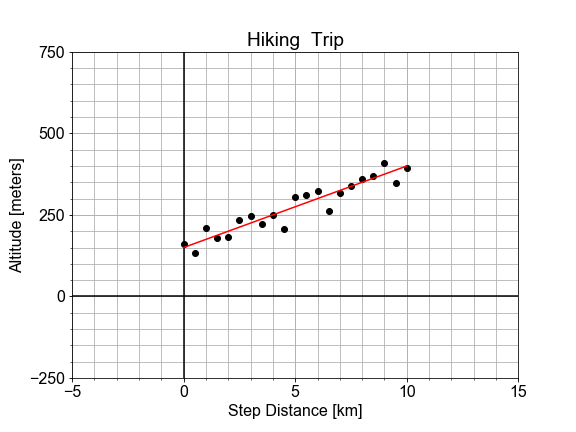

* Load the `x_data`, `y_data` with the pre-defined `load_data()` function.

* Call the pre-defined model(), passing in `x_data` and specific values `a0`, `a1`.

* Compute the residuals as `y_data - y_model` and then find `rss` by using `np.square()` and `np.sum()`.

* Print the resulting value of `rss`.

In [20]:
import numpy as np

def load_data():
    num_pts=21; a0=3.0*50; a1=0.5*50; mu=0; sigma=1; ae=0.5*50; seed=1234;
    np.random.seed(seed)
    xmin = 0
    xmax = 10
    x1 = np.linspace(xmin, xmax, num_pts)
    e1 = np.array([np.random.normal(mu, sigma) for n in range(num_pts)])
    y1 = a0 + (a1*x1) + ae*e1
    return x1, y1

def model(x, a0=150, a1=25):
    y = a0 + (a1*x)
    return y

# Load the data
x_data, y_data = load_data()

# Model the data with specified values for parameters a0, a1
y_model = model(x_data, a0=150, a1=25)

# Compute the RSS value for this parameterization of the model
rss = np.sum(np.square(y_data - y_model))
print("RSS = {}".format(rss))

RSS = 14444.484117694472


The value we compute for RSS is not meaningful by itself, but later it becomes meaningful in context when we compare it to other values of RSS computed for other parameterizations of the model. More on that next! 

Some notes about code style; notice you could have done the RSS calculation in a single line of python code, but writing functions than can be re-used is good practice. Notice also that we could have defined a parameter dictionary `dict(a0=150, a1=25)` and passed it into the model as `model(x, **parameters)` which would make it easier to pass around all the parameters together if we needed them for other functions.

### ***Minimizing the Residuals***

In this exercise, you will complete a function to visually compare model and data, and compute and print the RSS. You will call it more than once to see how RSS changes when you change values for `a0` and `a1`. We'll see that the values for the parameters we found earlier are the ones needed to minimize the RSS.

* Fill in the call to `model()` passing in the data `xd` and model parameters `a0` and `a1`.

* Compute `rss` as the sum of the square of the residuals.

* Use `compute_rss_and_plot_fit()` for various values of `a0` and `a1` to see how they change RSS.

* Convince yourself that the original values `a0=150` and `a1=25` minimize RSS.

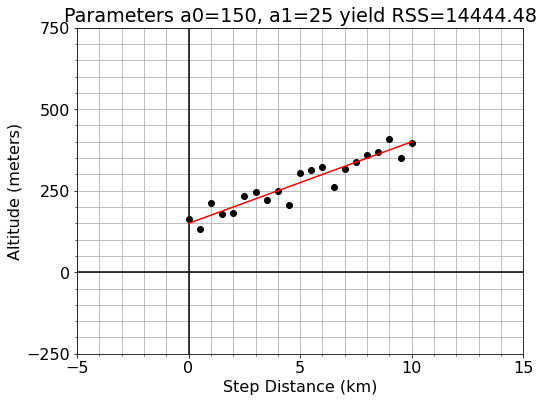

Parameters a0=150, a1=25 yield RSS=14444.48


In [22]:
import numpy as np
import matplotlib.pyplot as plt


def load_data():
    num_pts=21; a0=3.0*50; a1=0.5*50; mu=0.0; sigma=1.0; ae=0.5*50; seed=1234;
    np.random.seed(seed)
    xmin = 0.0
    xmax = 10.0
    x1 = np.linspace(xmin, xmax, num_pts)
    e1 = np.array([np.random.normal(mu, sigma) for n in range(num_pts)])
    y1 = a0 + (a1*x1) + ae*e1
    return x1, y1

def model(x, a0=100, a1=50):
    return a0 + (a1*x)

def plot_data_with_model(xd, yd, ym, title):
    fig = plot_data(xd, yd)
    fig.axes[0].plot(xd, ym, color="red")
    fig.axes[0].set_title(title)
    plt.show()

# Complete function to load data, build model, compute RSS, and plot
def compute_rss_and_plot_fit(a0, a1):
    xd, yd = load_data()
    ym = model(xd, a0, a1)
    residuals = ym - yd
    rss = np.sum(np.square(residuals))
    summary = "Parameters a0={}, a1={} yield RSS={:0.2f}".format(a0, a1, rss)
    fig = plot_data_with_model(xd, yd, ym, summary)
    return rss, summary

# Chose model parameter values and pass them into RSS function
rss, summary = compute_rss_and_plot_fit(a0=150, a1=25)
print(summary)

### ***Visualizing the RSS Minima***

You will compute and visualize how RSS varies for different values of model parameters. Start by holding the intercept constant, but vary the slope: and for each slope value, you'll compute the model values, and the resulting RSS. Once you have an array of RSS values, you will determine minimal RSS value, in code, and from that minimum, determine the slope that resulted in that minimal RSS.

Use pre-loaded data arrays `x_data`, `y_data`, and empty container `rss_list` to get started. 

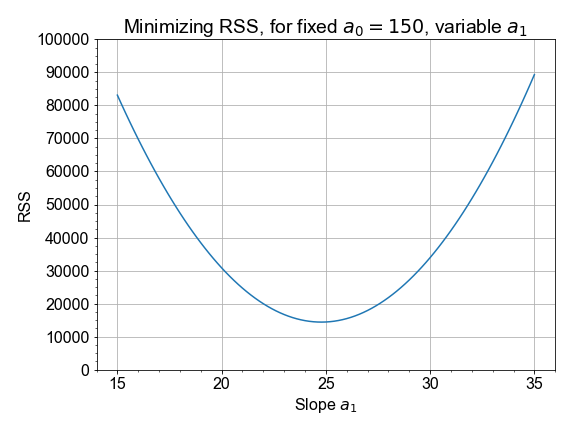

* For each trial value `a1` in `a1_array`, use `model()` to predict the model value, and then `compute_rss()` with `y_data`, `y_model`, store the output `rss_value` in `rss_list`.

* Convert `rss_list` to a `np.array()`, then use `np.min()` to find the minimum value in `rss_array`.

* Use `np.where()` to find the corresponding trial value and assign the result to `best_a1`.

* Use `plot_rss_vs_parameters()` to visually confirm your values agree with the figure shown.

The minimum RSS = 14411.193018382088, came from a1 = [24.8]


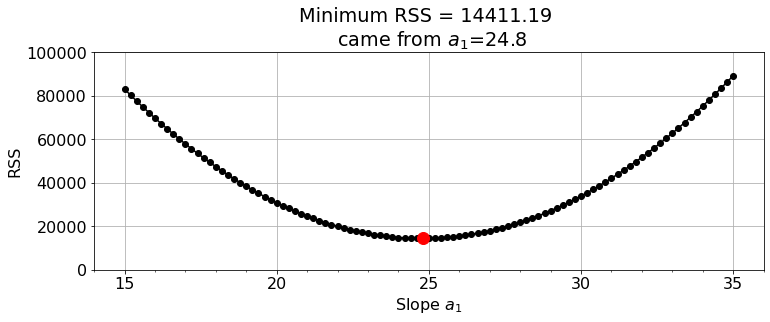

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

x_data = array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])
y_data = array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188])

def model(x, a0=150, a1=25):
    ym = a0 + (a1*x)
    return ym

def plot_rss_vs_parameters(a0, a1_array):
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    rss_list = []
    for a1_value in a1_array:
        ym = model(xd, a0, a1_value, a2=0)
        rss_value = compute_rss(yd, ym)
        rss_list.append(rss_value)
    rss_array = np.array(rss_list)
    fig, axis = plt.subplots(figsize=(12,4))
    axis.plot(a1_array, rss_array, marker="o")
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.grid(True, which="major")
    axis.set_ylabel("RSS")
    axis.set_xlabel("Slope $a_1$")
    axis.set_ylim([0,100000])
    axis.set_title("Minimizing RSS, for fixed $a_0 = {}$, variable $a_1$".format(a0))
    plt.show()

def compute_rss(yd, ym):
    rss = np.sum(np.square(yd-ym))
    return rss

def plot_rss_vs_a1(a1_array, rss_array):
    """
    Purpose:
        Plot RSS values (y-axis) versus a1 parameters values (x-axis)
         Also plot a point where the minimum RSS value occurs, and the 
         corresponding a1 value whose model resulted in that minimum RSS.
    Args:
        a1_array (np.array): an array of trial values for a1 (model slope)
        rss_array (np.array): an array of computed RSS values resulting from the a1_array
    Returns:
        fig (matplotlib.figure): figure object on which the data is plotted
    """
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(12,4))
    min_rss = np.min(rss_array) 
    best_slope = a1_array[np.where(rss_array==min_rss)]
    axis.plot(a1_array, rss_array, marker="o", color='black')
    axis.plot(best_slope, min_rss, marker="o", markersize=12, linestyle=" ", color='red')
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.grid(True, which="major")
    axis.set_ylabel("RSS")
    axis.set_xlabel("Slope $a_1$")
    axis.set_ylim([0,100000])
    axis.set_title("Minimum RSS = {:.02f} \n came from $a_1$={}".format(min_rss, best_slope[0]))
    plt.show()

rss_list = []

# Loop over all trial values in a1_array, computing rss for each
a1_array = np.linspace(15, 35, 101)
for a1_trial in a1_array:
    y_model = model(x_data, a0=150, a1=a1_trial)
    rss_value = compute_rss(y_data, y_model)
    rss_list.append(rss_value)

# Find the minimum RSS and the a1 value from whence it came
rss_array = np.array(rss_list)
best_rss = np.min(rss_array) 
best_a1 = a1_array[np.where(rss_array==best_rss)]
print('The minimum RSS = {}, came from a1 = {}'.format(best_rss, best_a1))

# Plot your rss and a1 values to confirm answer
fig = plot_rss_vs_a1(a1_array, rss_array)
 

### ***Least-Squares with `numpy`***

$$ a_{1} = \frac{ covariance(x, y) }{ variance(x) } $$
$$  a_{0} = mean(y) - a_{1} mean(x) $$
 
* Compute the means and deviations of the two variables `x`, `y` from the preloaded data.

* Use `np.sum()` to complete the least-squares formulae, and use them to compute the optimal values for `a0` and `a1`.

* Use `model()` to build the model values `y_model` from those optimal slope `a1` and intercept `a0` values.

* Use the pre-defined `compute_rss_and_plot_fit()` to visually confirm that this optimal model fits the data.

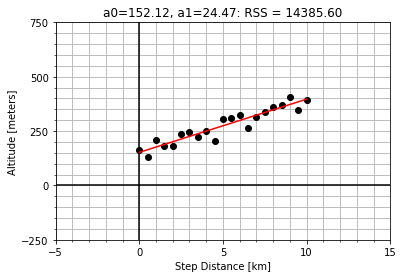

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from numpy import array

def compute_rss(yd, ym):
    rss = np.sum(np.square(yd-ym))
    return rss

def load_data():
    num_pts=21; a0=3.0*50; a1=0.5*50; mu=0; sigma=1; ae=0.5*50; seed=1234;
    np.random.seed(seed)
    xmin = 0
    xmax = 10
    x1 = np.linspace(xmin, xmax, num_pts)
    e1 = np.array([np.random.normal(mu, sigma) for n in range(num_pts)])
    y1 = a0 + (a1*x1) + ae*e1
    return x1, y1

def model(x, a0=150, a1=25):
    ym = a0 + (a1*x)
    return ym

def compute_rss_and_plot_fit(a0=3*50, a1=0.5*50):
    xd, yd = load_data()
    ym = model(xd, a0, a1)
    rss = compute_rss(yd, ym)
    fig = plot_data_with_model(xd, yd, ym)
    title_text="a0={:0.2f}, a1={:0.2f}: RSS = {:0.2f}".format(a0, a1, rss)
    fig.axes[0].set_title(title_text)
    plt.show()
    return fig, rss

def plot_data_with_model(x, y, ym):
    fig = plot_data(x, y)
    fig.axes[0].plot(x, ym, color="red")
    return fig

def plot_data(x, y):
    fig, axis = plt.subplots()
    axis.plot(x, y, color="black", linestyle=" ", marker="o")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.set_ylim([-5*50, 15*50])
    axis.set_xlim([-5, 15])
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0*50))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0*50))
    axis.set_ylabel('Altitude [meters]')
    axis.set_xlabel('Step Distance [km]')
    axis.set_title("Hiking  Trip")
    return fig

x = array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

y = array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188])

# prepare the means and deviations of the two variables
x_mean = np.mean(x)
y_mean = np.mean(y)
x_dev = x - x_mean
y_dev = y - y_mean

# Complete least-squares formulae to find the optimal a0, a1
a1 = np.sum(x_dev * y_dev) / np.sum( np.square(x_dev) )
a0 = y_mean - (a1 * x_mean)

# Use the those optimal model parameters a0, a1 to build a model
y_model = model(x, a0, a1)

# plot to verify that the resulting y_model best fits the data y
fig, rss = compute_rss_and_plot_fit(a0, a1)

Note that the values of the parameters obtained here are NOT exactly the ones used to generate the pre-loaded data (`a1=25` and `a0=150`), but they are close.

### ***Optimization with Scipy***

It is possible to write a numpy implementation of the analytic solution to find the minimal RSS value. But for more complex models, finding analytic formulae is not possible, and so we turn to other methods.

In this exercise you will use `scipy.optimize` to employ a more general approach to solve the same optimization problem.

In so doing, you will see additional return values from the method that tell answer us "how good is best". Here we will use the same measured data and parameters as seen in the last exercise for ease of comparison of the new scipy approach.

* Define a function `model_func(x, a0, a1)` that, for a given array `x` returns `a0 + a1*x`.

* Use the scipy function `optimize.curve_fit()` to compute optimal values for `a0` and `a1`.

* Unpack the `param_opt` so as to store the model parameters as `a0=param_opt[0]` and `a1=param_opt[1]`.

* Use the predefined function `compute_rss_and_plot_fit` to test and verify your answer.

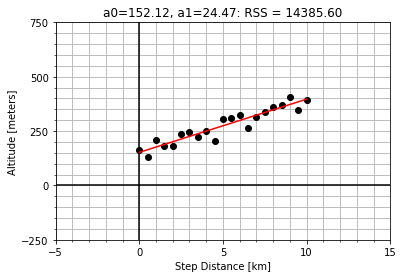

In [5]:
from scipy import optimize

# Define a model function needed as input to scipy
def model_func(x, a0, a1):
    return a0 + (a1*x)

# Load the measured data you want to model
x_data, y_data  = load_data()

# call curve_fit, passing in the model function and data; then unpack the results
param_opt, param_cov = optimize.curve_fit(model_func, x_data, y_data)
a0 = param_opt[0]  # a0 is the intercept in y = a0 + a1*x
a1 = param_opt[1]  # a1 is the slope     in y = a0 + a1*x

# test that these parameters result in a model that fits the data
fig, rss = compute_rss_and_plot_fit(a0, a1)

Notice that we passed the function object itself, model_func into curve_fit, rather than passing in the model data. The model function object was the input, because the optimization wants to know what form in general it's solve for; had we passed in a `model_func` with more terms like an `a2*x**2` term, we would have seen different results for the parameters output.

### ***Least-Squares with `statsmodels`***

Several python libraries provide convenient abstracted interfaces so that you need not always be so explicit in handling the machinery of optimization of the model.

As an example, in this exercise, you will use the `statsmodels` library in a more high-level, generalized work-flow for building a model using least-squares optimization (minimization of RSS).

To help get you started, we've pre-loaded the data from `x_data, y_data = load_data()` and stored it in a pandas DataFrame with column names `x_column` and `y_column` using `df = pd.DataFrame(dict(x_column=x_data, y_column=y_data))`

* Construct a model `ols()` with formula `formula="y_column ~ x_column"` and data `data=df`, and then `.fit()` it to the data.

* Use `model_fit.predict()` to get `y_model` values.

* Using the provided function `plot_data_with_model()`, over-plot the `y_data` with `y_model`.

* Extract the model parameter values `a0` and `a1` from `model_fit.params`.

* Use `compute_rss_and_plot_fit()` to confirm these results are consistent with the analytic formulae implemented with `numpy`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


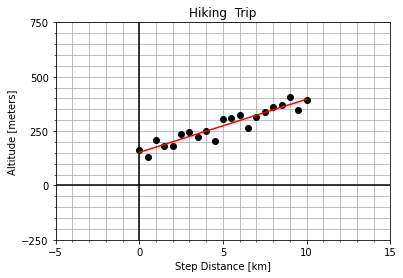

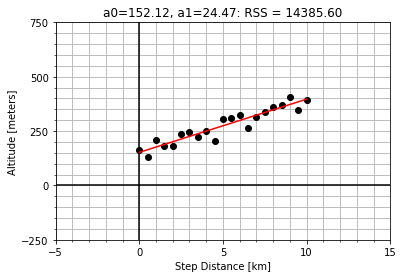

In [6]:
from statsmodels.formula.api import ols
import pandas as pd

x_data, y_data = load_data()
df = pd.DataFrame(dict(x_column=x_data, y_column=y_data))

# Pass data and `formula` into ols(), use and `.fit()` the model to the data
model_fit = ols(formula="y_column ~ x_column", data=df).fit()

# Use .predict(df) to get y_model values, then over-plot y_data with y_model
y_model = model_fit.predict(df)
fig = plot_data_with_model(x_data, y_data, y_model)

# Extract the a0, a1 values from model_fit.params
a0 = model_fit.params['Intercept']
a1 = model_fit.params['x_column']

# Visually verify that these parameters a0, a1 give the minimum RSS
fig, rss = compute_rss_and_plot_fit(a0, a1)

Note that the params container always uses `'Intercept'` for the `a0` key, but all higher order terms will have keys that match the column name from the pandas DataFrame that you passed into `ols()`. 

* Python style tip: notice that we used 'method chaining', which looks like this: `ols().fit()`. Since the object returned by `ols()` has a method `.fit()`, this can be a conveniently shorter way to express calculations in python rather than using multiple lines.

# ***Scikit-Learn***



In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

def load_data():
    num_pts=21; a0=3.0*50; a1=0.5*50; mu=0; sigma=1; ae=0.5*50; seed=1234;
    np.random.seed(seed)
    xmin = 0
    xmax = 10
    x1 = np.linspace(xmin, xmax, num_pts)
    e1 = np.array([np.random.normal(mu, sigma) for n in range(num_pts)])
    y1 = a0 + (a1*x1) + ae*e1
    return x1, y1

# Initialize a general model
model = LinearRegression(fit_intercept=True) # fit_intercept=True ให้ใส่จุดตัดมาด้วย

# Load and shape the data
x_raw, y_raw = load_data()
x_data = x_raw.reshape(len(y_raw),1)
y_data = y_raw.reshape(len(y_raw),1)

# Fit the model to the data
model_fit = model.fit(x_data, y_data)

# Extract the linear model parameters
intercept = model.intercept_[0]
slope = model.coef_[0,0]
print(f'intercept = {intercept:,.2f}, and slope = {slope:,.2f}')

# Use the model to make predictions
future_x = np.array([[2100]])
future_y = model.predict(future_x)
print(f'Predicted y = {future_y[0,0]:,.2f}')

intercept = 152.12, and slope = 24.47
Predicted y = 51,545.90


# ***Statsmodels***



                            OLS Regression Results                            
Dep. Variable:              distances   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     152.3
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.61e-10
Time:                        15:43:04   Log-Likelihood:                -98.357
No. Observations:                  21   AIC:                             200.7
Df Residuals:                      19   BIC:                             202.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1236     11.592     13.123      0.0

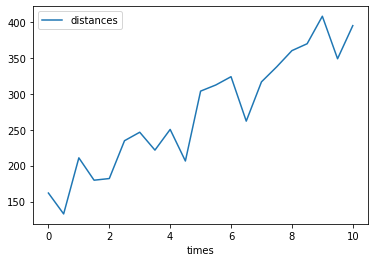

In [3]:
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd

def load_data():
    num_pts=21; a0=3.0*50; a1=0.5*50; mu=0; sigma=1; ae=0.5*50; seed=1234;
    np.random.seed(seed)
    xmin = 0
    xmax = 10
    x1 = np.linspace(xmin, xmax, num_pts)
    e1 = np.array([np.random.normal(mu, sigma) for n in range(num_pts)])
    y1 = a0 + (a1*x1) + ae*e1
    return x1, y1

x_data, y_data = load_data()
df = pd.DataFrame(dict(times=x_data, distances=y_data))
fig = df.plot('times', 'distances')
model_fit = ols(formula="distances ~ times", data=df).fit()
print(model_fit.summary())

a0 = model_fit.params['Intercept']
a1 = model_fit.params['times']
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['times']
print(f'intercept = {a0:,.4f}')
print(f'slope = {a1:,.4f}')
print(f'uncertainty_in_intercept = {e0:,.4f}')
print(f'uncertainty_in_slope = {e1:,.4f}')

### ***Linear Model in Anthropology***

Use data from many living people, and the python library `scikit-learn`, to build a linear model relating the length of the femur (thigh bone) to the "stature" (overall height) of the person. Then, you'll apply your model to make a prediction about the height of your ancient ancestor.

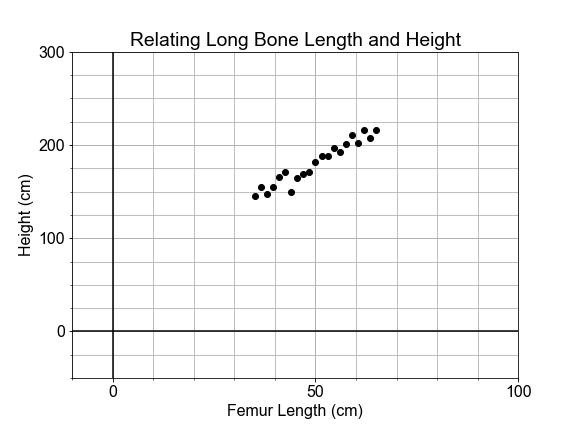

* import `LinearRegression` from `sklearn.linear_model` and initialize the model with `fit_intercept=False`.

* Reshape the pre-loaded data arrays legs and heights, from "1-by-N" to "N-by-1" arrays.

* Pass the reshaped arrays legs and heights into `model.fit()`. 

* Use `model.predict()` to predict the value `fossil_height` for the newly found fossil `fossil_leg = 50.7`.

In [6]:
from sklearn.linear_model import LinearRegression
import pandas as pd 
import numpy as np

df = pd.read_csv('femur_data.csv')
legs = df['length'].values
heights = df['height'].values



model = LinearRegression(fit_intercept=False)

# Prepare the measured data arrays and fit the model to them
legs = legs.reshape(len(legs),1)
heights = heights.reshape(len(legs),1)
model.fit(legs, heights)

# Use the fitted model to make a prediction for the found femur
fossil_leg = [[50.7]]
fossil_height = model.predict(fossil_leg)
print("Predicted fossil height = {:0.2f} cm".format(fossil_height[0,0]))

Predicted fossil height = 181.34 cm


Notice that we used 

* the ***pre-loaded data to fit or "train" the model***, and 
* then applied that model to make a prediction about newly collected data that was not part of the data used to fit the model. 

Also notice that `model.predict()` returns the answer as an array of shape = `(1,1)`, so we had to index into it with the `[0,0]` syntax when printing. 

### ***Linear Model in Oceanography***

Time-series data provides a context in which the "slope" of the linear model represents a "rate-of-change".

Use measurements of sea level change from 1970 to 2010, build a linear model of that changing sea level and use it to make a prediction about the future sea level rise.

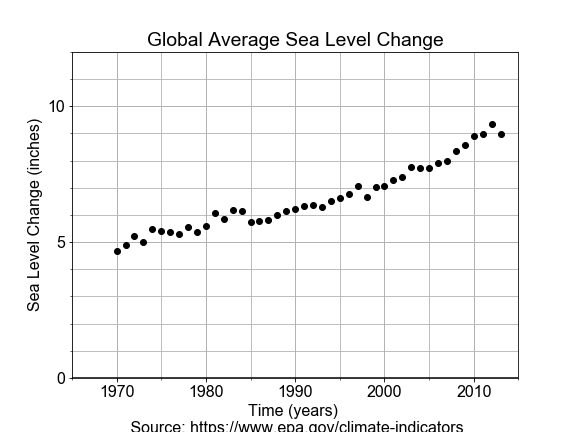

* Import and use `LinearRegression(fit_intercept=True)` to initialize a linear model.

* Pass in the pre-loaded and reshaped years and levels data into `model.fit()` to fit the model.

* Use `model.predict()` to predict a single `future_level` for `future_year = 2100`.

* Use `model.predict()` to forecast many `forecast_levels` and plot the result with the pre-defined `plot_data_and_forecast()`.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


Prediction: year = [[2100]], level = 16.66


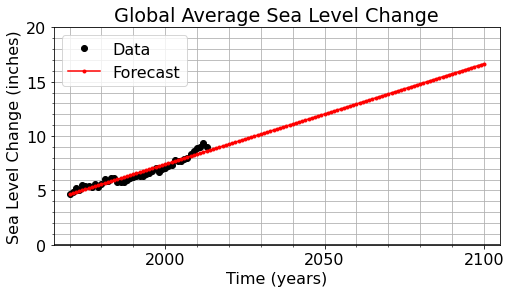

In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_data_and_forecast(years, levels, years_forecast, levels_forecast):
    """
    Purpose:
        Over-plot the forecast data with the measured data used to fit the model
    Args:
        years (np.array): independent ("x") variable of measured data set
        levels (np.array): dependent ("y") variable of measured data set
        years_forecast (np.array): independent ("x") variable of forecast/modeled data
        levels_forecast (np.array): dependent ("y") variable of forecast/modeled data
    Returns:
        fig (matplotlib.figure): matplotlib figure object containing the plot
    """
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,4))
    axis.plot(years, levels, color="black", linestyle=" ", marker="o", label='Data')
    axis.plot(years_forecast, levels_forecast, marker=".", color="red", label='Forecast')
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.xaxis.set_major_locator(MultipleLocator(50.0))
    axis.xaxis.set_minor_locator(MultipleLocator(10.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_ylim([0, 20])
    axis.set_xlim([1965, 2105])
    axis.set_ylabel('Sea Level Change (inches)')
    axis.set_xlabel('Time (years)')
    axis.set_title("Global Average Sea Level Change")
    axis.legend()
    plt.show()
    return fig

df = pd.read_csv('sea_level_data.csv')
years = df['year'].values.reshape(len(years),1)
levels = df['sea_level_inches'].values.reshape(len(years),1)

model = LinearRegression(fit_intercept=True)
model.fit(years, levels)

# Use model to make a prediction for one year, 2100
future_year = [[2100]]
future_level = model.predict(future_year)
print("Prediction: year = {}, level = {:.02f}".format(future_year, future_level[0,0]))

# Use model to predict for many years, and over-plot with measured data
years_forecast = np.linspace(1970, 2100, 131).reshape(-1, 1)
levels_forecast = model.predict(years_forecast)
fig = plot_data_and_forecast(years, levels, years_forecast, levels_forecast)               

Note that with scikit-learn, although we could extract `a0 = model.intercept_[0]` and `a1 = model.coef_[0,0]`, we do not need to do that in order to make predictions, we just call `model.predict()`. With more complex models, these parameters may not have easy physical interpretations. Notice also that although our model is linear, the actual data appears to have an up-turn that might be better modeled by adding a quadratic or even exponential term to our model. The linear model forecast may be underestimating the rate of increase in sea level.

### ***Linear Model in Cosmology***

Build a model whose slope will give Hubble's Constant, which describes the velocity of galaxies as a linear function of distance from Earth.

* Use the pre-loaded DataFrame with columns `names`, `distances`, and `velocities`.

* Build and fit a model using `ols().fit()` with `formula="velocities ~ distances"` and `data=df`.

* Extract the parameter estimates for the intercept and slope using `model_fit.params`, passing these to `a0` and `a1` respectively.

* Repeat the process for the corresponding uncertainty values, this time using `model_fit.bse`.

In [15]:
from statsmodels.formula.api import ols
import pandas as pd 
import numpy as np

df = pd.read_csv('hubble_data.csv')
names, distances, velocities = df['names'], df['distances'], df['velocities']

# Fit the model, based on the form of the formula
model_fit = ols(formula="velocities ~ distances", data=df).fit()

# Extract the model parameters and associated "errors" or uncertainties
a0 = model_fit.params['Intercept']
a1 = model_fit.params['distances']
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['distances']

# Print the results
print('For slope a1={:.02f}, the uncertainty in a1 is {:.02f}'.format(a1, e1))
print('For intercept a0={:.02f}, the uncertainty in a0 is {:.02f}'.format(a0, e0))


For slope a1=454.16, the uncertainty in a1 is 75.24
For intercept a0=-40.78, the uncertainty in a0 is 83.44


Notice the `~` in the formula means "similar to" and is interpreted by `statsmodels` to mean that `y ~ x` have a linear relationship. Modeling with new data revealed a different slope.

### ***Interpolation: Inbetween Times***

Build a linear model by fitting monthly time-series data for the Dow Jones Industrial Average (DJIA) and then use that model to make predictions for daily data (in effect, an interpolation). Then you will compare that daily prediction to the real daily DJIA data.

A few notes on the data. "OHLC" stands for "Open-High-Low-Close", which is usually daily data, for example the opening and closing prices, and the highest and lowest prices, for a stock in a given day. "DayCount" is an integer number of days from start of the data collection.

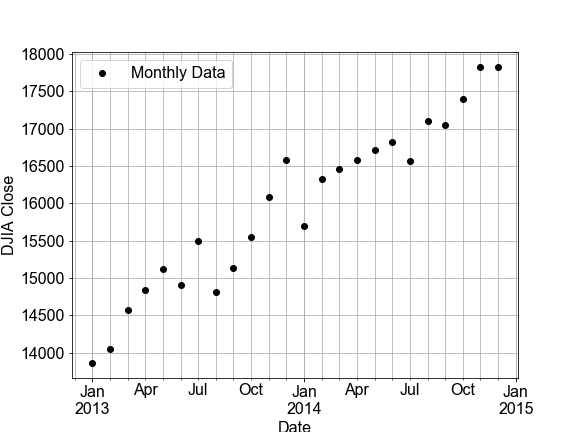

* Use `ols()` to `.fit()` a model to the `data=df_monthly` with `formula="Close ~ DayCount"`.

* Use `model_fit.predict()` on both `df_monthly.DayCount` and `df_daily.DayCount` to predict values for the monthly and daily `Close` prices, stored as a new column `Model` in each DataFrame.

* Use the predefined `plot_model_with_data` twice, on each `df_monthly` and `df_daily` and compare the RSS values shown.

In [ ]:
# build and fit a model to the df_monthly data
model_fit = ols('Close ~ DayCount', data=df_monthly).fit()

# Use the model FIT to the MONTHLY data to make a predictions for both monthly and daily data
df_monthly['Model'] = model_fit.predict(df_monthly.DayCount)
df_daily['Model'] = model_fit.predict(df_daily.DayCount)

# Plot the monthly and daily data and model, compare the RSS values seen on the figures
fig_monthly = plot_model_with_data(df_monthly)
fig_daily = plot_model_with_data(df_daily)

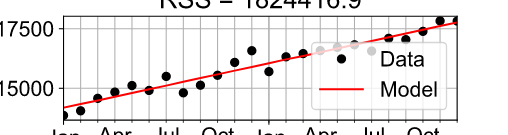

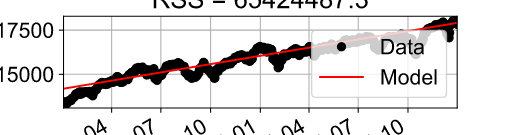

Notice the monthly data looked linear, but the daily data clearly has additional, nonlinear trends. Under-sampled data often misses real-world features in the data on smaller time or spatial scales. Using the model from the under-sampled data to make interpolations to the daily data can result is large residuals. Notice that the RSS value for the daily plot is more than 30 times worse than the monthly plot.

### ***Extrapolation: Going Over the Edge***

In this exercise, we consider the perils of extrapolation. Shown here is the profile of a hiking trail on a mountain. One portion of the trail, marked in black, looks linear, and was used to build a model. But we see that the best fit line, shown in red, does not fit outside the original "domain", as it extends into this new outside data, marked in blue.

If we want use the model to make predictions for the altitude, but still be accurate to within some tolerance, what are the smallest and largest values of independent variable x that we can allow ourselves to apply the model to?"

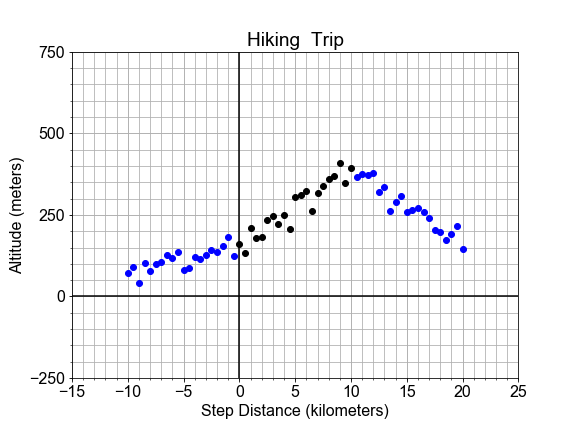


* Use `np.abs()` to compute the residuals as the differences `y_data - y_model`
* Find the `.min()` and `.max()` values of `x` at which the residuals are less than a `tolerance = 100` meters.

* Use `np.min()` and `np.max()` to print the range (the largest and smallest) of `x_good` values.

* Use the predefined `plot_data_model_tolerance()` to compare the data, model, and range of `x_good` values where the `residuals < tolerance` is `True`.

In [ ]:
# Compute the residuals, "data - model", and determine where [residuals < tolerance]
residuals = np.abs(y_data - y_model)
tolerance = 100
x_good = x_data[residuals < tolerance]

# Find the min and max of the "good" values, and plot y_data, y_model, and the tolerance range
print('Minimum good x value = {}'.format(np.min(x_good)))
print('Maximum good x value = {}'.format(np.max(x_good)))
fig = plot_data_model_tolerance(x_data, y_data, y_model, tolerance)

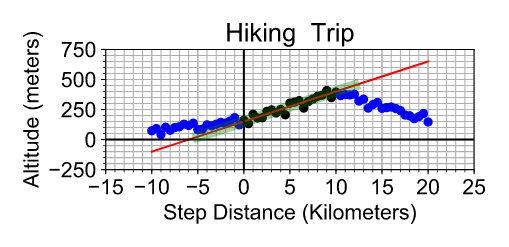

```
Minimum good x value = -5.0
Maximum good x value = 12.0
```

Notice the range of good values, which extends a little out into the new data, is marked in green on the plot. By comparing the residuals to a tolerance threshold, we can quantify how far out out extrapolation can go before the difference between model and data gets too large.

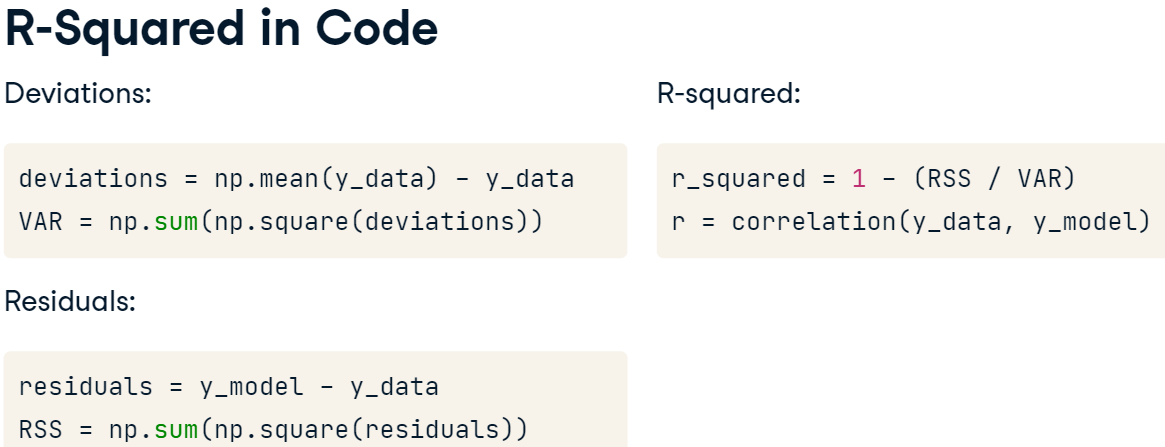

### ***RMSE Step-by-step***

In this exercise, you will quantify the over-all model "goodness-of-fit" of a pre-built model, by computing one of the most common quantitative measures of model quality, the RMSE, step-by-step.

* Compute `y_model` values from `model_fit_and_predict(x_data, y_data)`.

* Compute the residuals as the difference between `y_model` and `y_data`.

* Use `np.sum()` and `np.square()` to compute `RSS`, and divide by `len(residuals)` to get `MSE`.

* Take the `np.sqrt()` of `MSE` to get `RMSE`.

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from numpy import array

def model_fit_and_predict(x, y):
    a0=150
    a1=25
    ym = a0 + (a1*x)
    return ym

x_data = array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

y_data = array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188])

# Build the model and compute the residuals "model - data"
y_model = model_fit_and_predict(x_data, y_data)
residuals = y_model - y_data

# Compute the RSS, MSE, and RMSE and print the results
RSS = np.sum(np.square(residuals))
MSE = RSS/len(residuals)
RMSE = np.sqrt(MSE)
print('RMSE = {:0.2f}, MSE = {:0.2f}, RSS = {:,.2f}'.format(RMSE, MSE, RSS))

RMSE = 26.23, MSE = 687.83, RSS = 14,444.48


Notice that instead of computing `RSS` and normalizing with division by `len(residuals)` to get the `MSE`, you could have just applied `np.mean(np.square())` to the `residuals`. Another useful point to help you remember; you can think of the `MSE` like a variance, but instead of differencing the data from its mean, 

* ***for MSE you difference the data and the model.*** 

Similarly, think of RMSE as a standard deviation.

### ***R-Squared***

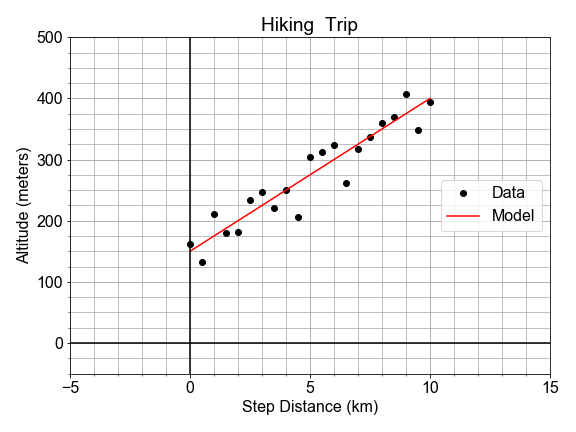


* Compute the `residuals`, by subtracting the `y_data` from the `y_model`, and the `deviations`, by subtracting the `y_data` from the `np.mean()` of the `y_data`.

* Compute the variance of the `residuals` and the variance of the deviations, using `np.mean()` and `np.square()` to each.

* Compute the `r_squared` as `1` minus the ratio `var_residuals / var_deviations`.

In [10]:
# Compute the residuals and the deviations
residuals = y_model - y_data
deviations = np.mean(y_data) - y_data

# Compute the variance of the residuals and deviations
var_residuals = np.mean(np.square(residuals))
var_deviations = np.mean(np.square(deviations))

# Compute r_squared as 1 - the ratio of RSS/Variance
r_squared = 1 - (var_residuals / var_deviations)
print('R-squared is {:0.2f}'.format(r_squared))

R-squared is 0.89


### ***Variation Around the Trend***

The data need not be perfectly linear, and there may be some random variation or "spread" in the measurements, and that does translate into variation of the model parameters. This variation is in the parameter is quantified by "standard error", and interpreted as "uncertainty" in the estimate of the model parameter.

In this exercise, you will use `ols` from `statsmodels` to build a model and extract the standard error for each parameter of that model.

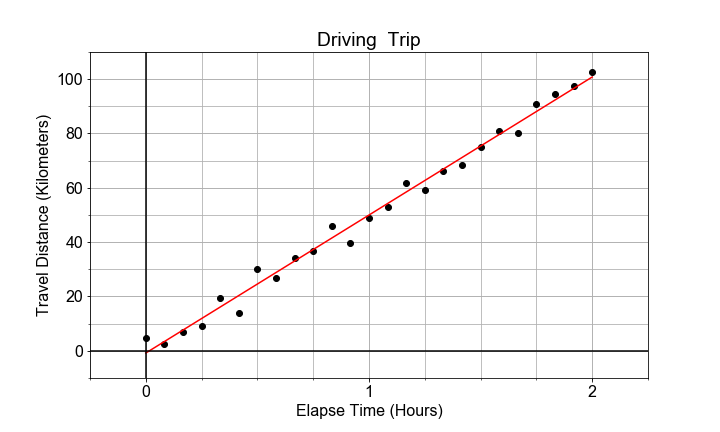

* Store the preloaded data in a DataFrame `df`, labeling `x_data` as `times` and `y_data` as `distances`.

* Use `model_fit = ols().fit()` to fit a linear model or the form `formula="distances ~ times"` to the `data=df`.

* Extract the estimated intercept `model_fit.params['Intercept']` and the standard error of the slope from `model_fit.bse['Intercept']`.

* Repeat for the slope, and then print all 4 with meaningful names.

In [11]:
from statsmodels.formula.api import ols
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from numpy import array

y_data = array([   4.87303609,    2.33139743,    6.74881808,    9.28109413,
         19.26288955,   13.92871724,   30.23443529,   26.88304596,
         34.29045062,   36.75188887,   46.05299048,   39.6529112 ,
         49.03274839,   53.0145036 ,   61.73464166,   59.2003262 ,
         66.14938204,   68.19975808,   75.12664124,   80.91511231,
         80.0314758 ,   90.93417113,   94.37143883,   97.34081635,
        102.70256785])

x_data = array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ])

# Store x_data and y_data, as times and distances, in df, and use ols() to fit a model to it.
df = pd.DataFrame(dict(times=x_data, distances=y_data))
model_fit = ols(formula="distances ~ times", data=df).fit()

# Extact the model parameters and their uncertainties
a0 = model_fit.params['Intercept']
e0 = model_fit.bse['Intercept']
a1 = model_fit.params['times']
e1 = model_fit.bse['times']

# Print the results with more meaningful names
print('Estimate    of the intercept = {:0.2f}'.format(a0))
print('Uncertainty of the intercept = {:0.2f}'.format(e0))
print('Estimate    of the slope = {:0.2f}'.format(a1))
print('Uncertainty of the slope = {:0.2f}'.format(e1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Estimate    of the intercept = -0.81
Uncertainty of the intercept = 1.29
Estimate    of the slope = 50.78
Uncertainty of the slope = 1.11


### ***Variation in Two Parts***

Given two data sets of distance-versus-time data, one with very small velocity and one with large velocity. Notice that both may have the same standard error of slope, but different R-squared for the model overall, depending on the size of the slope ("effect size") as compared to the standard error ("uncertainty").

If we plot both data sets as scatter plots on the same axes, the contrast is clear. Variation due to the slope is different than variation due to the random scatter about the trend line. In this exercise, your goal is to compute the standard error and R-squared for two data sets and compare.

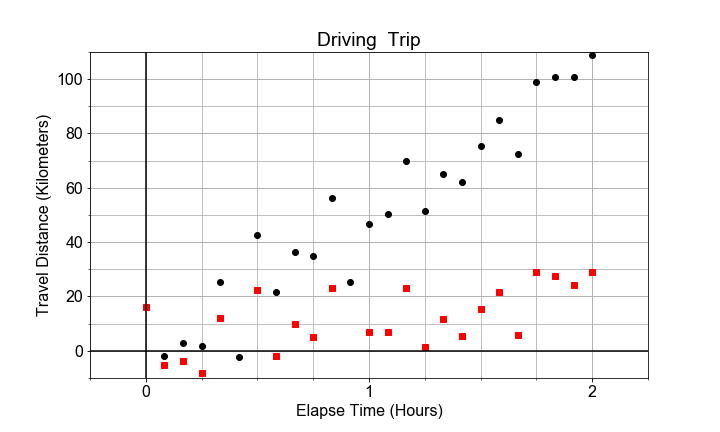

* Build and `fit()` an `ols()` model, for both data sets `distances1` and `distances2`.

* Use the `.bse` of resulting models `model_1` and `model_2`, and the `'times'` key to extract the standard error values for the slope from each model.

* Use the `.rsquared` attribute to extract the R-squared value from each model.

* Print the resulting `se_1`, `rsquared_1`, `se_2`, `rsquared_2`, and visually compare.

In [ ]:
# Build and fit two models, for columns distances1 and distances2 in df
model_1 = ols(formula="distances1 ~ times", data=df).fit()
model_2 = ols(formula="distances2 ~ times", data=df).fit()

# Extract R-squared for each model, and the standard error for each slope
se_1 = model_1.bse['times']
se_2 = model_2.bse['times']
rsquared_1 = model_1.rsquared
rsquared_2 = model_2.rsquared

# Print the results
print('Model 1: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_1, rsquared_1))
print('Model 2: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_2, rsquared_2))

```
Model 1: SE = 3.694, R-squared = 0.898
Model 2: SE = 3.694, R-squared = 0.335
```

Notice that the standard error is the same for both models, but the r-squared changes. 

* ***The uncertainty in the estimates of the model parameters is indepedent from R-squred, ***

because that uncertainty is being driven NOT by the linear trend, but by the inherent randomness in the data. This serves as a transition into looking at statistical inference in linear models.

### ***Sample Statistics versus Population***

In this exercise you will work with a preloaded population. You will construct a sample by drawing points at random from the population. You will compute the mean standard deviation of the sample taken from that population to test whether the sample is representative of the population. Your goal is to see where the sample statistics are the same or very close to the population statistics.

* Compute and print the mean and standard deviation of the population data.

* Use the `np.random.seed()` method to set numpy's pseudorandom sampler seed as `42`.

* Use `np.random.choice()` to create a sample of `size=31`, where `size` is the number of points drawn from the population.

* Compute and print the mean and standard deviation of the sample and inspect the printed values of the sample statistics and population statistics to see whether they differ.


In [ ]:
# Compute the population statistics
print("Population mean {:.1f}, stdev {:.2f}".format( population.mean(), population.std() ))

# Set random seed for reproducibility
np.random.seed(42)

# Construct a sample by randomly sampling 31 points from the population
sample = np.random.choice(population, size=31)

# Compare sample statistics to the population statistics
print("    Sample mean {:.1f}, stdev {:.2f}".format( sample.mean(), sample.std() ))

```
Population mean 100.0, stdev 9.74
    Sample mean 102.1, stdev 9.34
```
Notice that the sample statistics are similar to the population statistics, but not the identical. If you were to compute the `len()` of each array, it is very different, but the means are not that much different as you might expect.

### ***Variation in Sample Statistics***

Create one sample of `size=1000` by drawing that many points from a population. Then compute a sample statistic, such as the mean, a single value that summarizes the sample itself.

If you repeat that sampling process `num_samples=100` times, you get `100` samples. Computing the sample statistic, like the mean, for each of the different samples, will result in a distribution of values of the mean. The goal then is to compute the mean of the means and standard deviation of the means.

Here you will use the preloaded population, `num_samples`, and `num_pts`, and note that the means and deviations arrays have been initialized to zero to give you containers to use for the `for` loop.


* For each of `num_samples=100`, generate a sample, then compute and storing the sample statistics.

* For each iteration, create a sample by using `np.random.choice()` to draw `1000` random points from the population.

* For each iteration, compute and store the methods `sample.mean()` and `sample.std()` to compute the mean and standard deviation of the sample.

* For the array of `means` and the array of `deviations`, compute both the mean and standard deviation of each, and print the results.


In [ ]:
# Initialize two arrays of zeros to be used as containers
means = np.zeros(num_samples)
stdevs = np.zeros(num_samples)

# For each iteration, compute and store the sample mean and sample stdev
for ns in range(num_samples):
    sample = np.random.choice(population, num_pts)
    means[ns] = sample.mean()
    stdevs[ns] = sample.std()

# Compute and print the mean() and std() for the sample statistic distributions
print("Means:  center={:>6.2f}, spread={:>6.2f}".format(means.mean(), means.std()))
print("Stdevs: center={:>6.2f}, spread={:>6.2f}".format(stdevs.mean(), stdevs.std()))

```
Means:  center=100.00, spread=  0.33
Stdevs: center= 10.01, spread=  0.22
```

If we only took one sample, instead of 100, there could be only a single mean and the standard deviation of that single value is zero. But each sample is different because of the randomness of the draws. The mean of the means is our estimate for the population mean, the stdev of the means is our measure of the uncertainty in our estimate of the population mean. This is the same concept as the standard error of the slope seen in linear regression.

### ***Visualizing Variation of a Statistic***

Previously, you have computed the variation of sample statistics. Now you'll visualize that variation.

We'll start with a preloaded population and a predefined function `get_sample_statistics()` to draw the samples, and return the sample statistics arrays.

Here we will use a `predefined plot_hist()` function that wraps the matplotlib method `axis.hist()`, which both bins and plots the array passed in. In this way you can see how the sample statistics have a distribution of values, not just a single value.

* Pass the population into `get_sample_statistics()` to get the sample statistic distributions.

* Use `np.linspace()` to define histogram bin edges for each statistic array.

* Use the predefined `plot_hist()` twice, to plot the statistic distributions means and deviations as two separate histograms.

In [ ]:
# Generate sample distribution and associated statistics
means, stdevs = get_sample_statistics(population, num_samples=100, num_pts=1000)

# Define the binning for the histograms
mean_bins = np.linspace(97.5, 102.5, 51)
std_bins = np.linspace(7.5, 12.5, 51)

# Plot the distribution of means, and the distribution of stdevs
fig = plot_hist(data=means, bins=mean_bins, data_name="Means", color='green')
fig = plot_hist(data=stdevs, bins=std_bins, data_name="Stdevs", color='red')

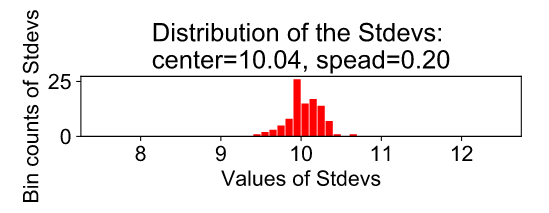

Notice you have to page through the plots to see both. Can you see the center and spread in the title and the plots? If you have not before, compute those values using e.g. `means.mean()` and `means.std()` to see that they match the figure.

### ***Estimation of Population Parameters***

Assume that the population of hourly distances are best modeled by a gaussian, and further assume that the parameters of that population model can be estimated from the sample statistics. Start with the preloaded `sample_distances` that was taken from a population of cars.
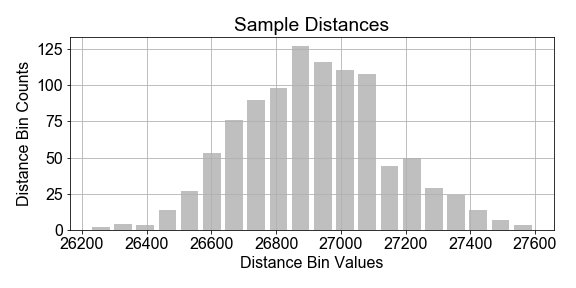
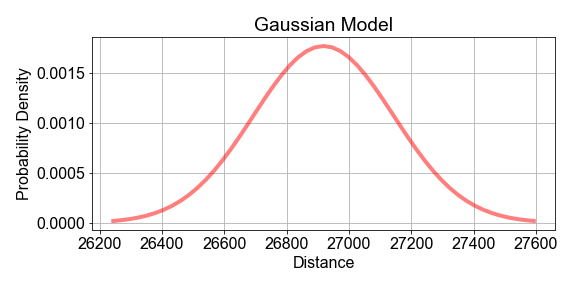

* Compute the mean and standard deviation of the `sample_distances`.

* Use the sample statistics, `mean` and `stdev`, good estimates for parameters `mu` and `sigma` of a population model.

* Pass those values, and `sample_distances`, into the predefined `gaussian_model()` to build the population model.

* Use the predefined `plot_model_and_data()` to plot the sample data and the population model together.

In [13]:
sample_distances = array([ 27143.88628178,  27087.98325817,  27580.04229165,  27113.1083337 ,
        27057.40721048,  26693.19226411,  26916.87962035,  27229.72020211,
        26755.77703262,  26994.32512326,  26863.90989702,  26885.76359407,
        27055.16802439,  26846.50278894,  26761.62724163,  27011.92714   ,
        27006.0414866 ,  27112.55543553,  27075.29318558,  27241.03510749,
        26886.05773059,  26853.25717425,  27356.50242839,  27083.71944651,
        27048.1317373 ,  26833.17214224,  27187.1114273 ,  26792.09492182,
        27327.65334315,  26905.32791217,  26965.08045969,  26781.97735558,
        27001.76307178,  26457.73102378,  27104.47241451,  27039.42276518,
        26984.93044729,  27015.64782321,  26734.91971513,  26917.33608426,
        27018.00056773,  26687.14839143,  27339.65512105,  26999.48176249,
        27232.23332988,  27055.67780598,  26558.44932455,  26853.1677454 ,
        26801.88222348,  26861.18523779,  26801.07982206,  27313.85177827,
        27028.90702211,  27134.47888438,  27184.32863559,  26655.06969382,
        26766.95785922,  27246.58734932,  26859.90997974,  26843.13093501,
        27453.13275985,  26873.41574937,  26878.4825768 ,  26822.42307365,
        26994.9099121 ,  26946.60404244,  26877.97718899,  26823.59522223,
        26901.05746475,  27042.79485155,  26678.05762212,  26815.86185253,
        26705.87521488,  27025.03575828,  26601.45264973,  27063.85095746,
        26873.54531063,  26962.82916206,  27075.37369548,  27084.79512368,
        26864.61856166,  27223.18632238,  26557.40113102,  26995.79204744,
        26917.01806731,  26749.54338877,  26600.2621505 ,  26919.74101142,
        27092.700555  ,  26977.8727147 ,  26849.13471473,  26524.28234783,
        26903.92055912,  26957.90186854,  27053.1976854 ,  27113.30038626,
        26833.69061488,  26980.32286769,  27457.87472776,  26607.4298234 ,
        27120.50297762,  26813.97549293,  27119.1785466 ,  26990.11041907,
        26753.55181914,  26525.20469951,  26842.72974227,  26973.67981323,
        26644.18669416,  27335.23537165,  26974.77143351,  27114.95839037,
        26858.96264682,  26835.49786595,  26531.37432824,  27126.72630558,
        26913.79981063,  26860.88065597,  27238.26729004,  26903.87271231,
        27513.09247822,  26548.8345489 ,  26999.26166747,  27057.7189009 ,
        26855.09506965,  26846.60168945,  26998.49380647,  26681.04629384,
        27053.79099607,  26496.07750486,  27036.1456002 ,  27016.92252596,
        26481.37833241,  27463.50952723,  26941.62131814,  26709.51469047,
        26566.83038974,  27183.90514637,  26857.18592379,  26890.57821981,
        27297.38075903,  27182.21187189,  27007.75242303,  26745.98219617,
        26604.88487869,  27265.42925406,  26966.86884722,  26737.8827    ,
        26861.68486165,  27100.295441  ,  27187.91639576,  27244.33375738,
        26785.46575254,  26596.83571684,  26634.24093179,  26977.26170876,
        26837.52656605,  27161.00628236,  26824.60504805,  26818.95578474,
        26933.79406034,  26746.69702688,  26992.12439671,  26594.40884625,
        27136.65457708,  27006.47774178,  27348.6312121 ,  26640.05169387,
        26714.48926311,  26976.750765  ,  26891.78137871,  27415.10567461,
        26863.34205649,  26864.13041363,  26933.87284308,  27240.9018238 ,
        26780.34584953,  27101.21398455,  26536.27695868,  27205.70198053,
        26766.53883905,  26828.57836298,  26995.50842643,  26714.33520856,
        26850.33271654,  27351.41721953,  26804.22626971,  26654.90293713,
        27304.44206032,  26847.36626491,  26804.55720083,  26829.07844477,
        26764.00163473,  27052.12291217,  26567.20279511,  26960.61254516,
        27065.57672416,  26744.10077992,  27314.71742361,  26663.42154431,
        26970.9819719 ,  26694.67840398,  26996.04004449,  26801.79974578,
        27061.01623074,  26937.19018333,  26857.45686715,  26593.49519935,
        26716.65215727,  27010.58406499,  27054.09857263,  26944.52372485,
        26878.21290192,  26989.57495373,  27096.37064746,  26716.88817842,
        26836.57256623,  27033.67598741,  26863.87803964,  27047.20798789,
        27034.91369359,  26685.87451072,  27039.83885243,  26791.89970318,
        26849.33668429,  27026.34834406,  26695.23683922,  26904.80471305,
        26436.85015118,  26830.81472121,  26911.67043354,  27404.79981318,
        26957.87969301,  27033.96423562,  26957.63539671,  26771.38920367,
        27258.24706918,  26968.81217189,  27199.03755538,  26961.52942659,
        26739.94237613,  27134.65276966,  26630.07179143,  26754.10986303,
        26734.2688266 ,  26955.89986361,  26980.93876681,  26780.9502099 ,
        26881.43697313,  26861.55370871,  26938.04451192,  27424.71030759,
        27224.90782133,  27567.66884372,  26942.45666815,  26666.49862448,
        26811.51215308,  26862.3358439 ,  26990.77460817,  26724.01040161,
        26716.03660602,  27089.57059653,  27089.43869505,  26738.7977659 ,
        26639.01975494,  26732.8054403 ,  27148.6025703 ,  26772.1406178 ,
        26823.98368548,  26944.55993598,  26899.06286655,  27274.75301706,
        26732.66097594,  27078.97928512,  27156.28365114,  26674.92376282,
        26591.16650517,  26901.28578514,  26854.2124564 ,  26637.76152564,
        27067.74816302,  26977.5439568 ,  26938.91884692,  27056.15166122,
        26905.21037053,  26887.87603461,  26618.12393823,  26842.1454847 ,
        27243.69949251,  27019.77978195,  27024.08660277,  26942.38510255,
        26855.35443262,  26486.76635941,  26514.29446274,  26886.15161863,
        26585.50047227,  26654.4768983 ,  26991.29015812,  27157.85397661,
        26933.96043703,  26890.65691518,  27238.72323288,  26805.130186  ,
        27125.58144028,  27327.70213603,  27171.75239724,  27093.72863873,
        26587.66972079,  26617.52797802,  26821.20198502,  26857.73533964,
        26635.38737764,  26661.90040372,  26829.5779198 ,  26741.62947342,
        27190.30556829,  26579.22864091,  27497.96834736,  27081.02355063,
        26769.52914657,  26985.74574184,  27595.80878556,  26487.11507164,
        27292.42142024,  26733.38001826,  26648.9204039 ,  27429.34320411,
        26843.95841763,  26892.15101573,  26822.53694383,  26475.39327269,
        26981.99259762,  26764.28248029,  27077.40025535,  26873.83834394,
        27194.15938715,  26953.27264372,  26964.84608336,  27080.18180957,
        26683.31744167,  26502.83895785,  26844.16395718,  27134.59783351,
        26990.62775284,  26922.07725332,  27190.05269203,  27065.33499104,
        27268.61508165,  26512.11430426,  26612.70415815,  26942.6117626 ,
        26785.98958143,  26879.59951891,  27074.25111081,  26638.0334235 ,
        26858.27340454,  27265.22585654,  26731.03040891,  26706.0906174 ,
        26881.98394737,  27076.9711286 ,  27072.06023771,  27172.94087273,
        26860.60951111,  26637.69630775,  26921.5832547 ,  26868.06131472,
        26600.09476209,  26660.55416077,  26615.43446626,  26834.83778753,
        27068.60120026,  26916.29208527,  26988.51212715,  26825.589366  ,
        27010.21997456,  26767.49717399,  26582.69461741,  26654.01298353,
        26878.09411344,  26842.16941808,  26769.71400851,  26793.55753181,
        26780.7725181 ,  26832.16520869,  26520.33080082,  26878.99396777,
        26626.28412691,  26836.54178272,  26747.54469582,  27325.33127661,
        27000.43140943,  26591.54085344,  27050.44515082,  26819.78852642,
        26768.79271964,  26623.20005054,  26499.24012889,  27034.55732796,
        26972.30548523,  27076.97833476,  27145.97653883,  27370.45045816,
        26788.54262976,  27185.12908371,  27105.10953604,  26633.87050673,
        26497.62446903,  26629.59429991,  27303.09765554,  27512.90634296,
        26979.4130203 ,  27288.31979692,  26775.90921763,  27246.3093449 ,
        26702.97967346,  27127.80327595,  26887.79015222,  26845.61680541,
        27325.07216057,  26912.04092278,  26698.64746013,  27069.89578735,
        26896.89216195,  26825.16825668,  26719.23253875,  27089.1351968 ,
        26907.17017392,  26615.46233873,  26647.44351774,  26882.2284668 ,
        26873.25430701,  27131.32632721,  26561.99089323,  26896.45048256,
        26779.47437051,  26866.97946212,  26580.68558289,  26866.31573419,
        26942.87693368,  26575.09935991,  26895.31801405,  26927.33675451,
        27097.5658296 ,  27128.16478439,  26405.45893621,  26994.71552069,
        27063.31273634,  26748.21332282,  26808.8932871 ,  26724.7750947 ,
        26886.51488927,  26505.51673261,  26998.04607751,  26816.22792519,
        26849.55072425,  26826.30312419,  27380.98648648,  27001.70154691,
        26945.59491929,  26892.01594966,  27008.94931909,  27216.56367404,
        26780.61753675,  27085.16847858,  27309.98648719,  27024.33210759,
        26696.51722235,  26885.77145915,  27091.30918844,  27288.44923661,
        26843.78490903,  26995.37811275,  27138.50850968,  27075.52853479,
        26788.01558595,  26686.5137108 ,  26907.76987956,  27043.41094828,
        27002.33688256,  27000.58628711,  26923.24546555,  26992.01623444,
        26839.18921918,  26876.01983098,  26824.33127226,  26670.56916053,
        27171.51413067,  26223.68323013,  27181.98404   ,  26803.87711263,
        27103.321864  ,  27095.93537004,  26770.49982931,  27057.20228503,
        27221.60761577,  27094.98258615,  27115.18560631,  26842.77894778,
        27323.4894849 ,  26881.86334618,  26837.51410218,  27130.37924233,
        26660.94358069,  26731.11198984,  26905.96625456,  26789.17451613,
        26934.47552903,  26695.9977087 ,  26951.91390559,  26930.80109208,
        26650.40867341,  27314.64800395,  26801.46760827,  27087.49867632,
        26630.66491592,  26918.4092305 ,  26953.25107897,  26717.30404149,
        26949.66946678,  26754.97063429,  26870.10207066,  26807.38876625,
        27107.55234701,  26601.59319672,  26821.24022814,  26685.63552257,
        27044.86820473,  27416.09728796,  26677.99084544,  26854.67530358,
        26786.93680732,  27010.23095439,  27232.56444479,  26887.24710797,
        26680.41523995,  26834.47744991,  27062.41793769,  26763.82670317,
        26935.17919968,  27100.28799049,  26698.32757744,  27198.96478924,
        26650.21345545,  26887.53157538,  26814.57686748,  26605.44529358,
        27215.91089759,  26685.02505006,  26807.00356023,  27183.35159978,
        27299.01025863,  26540.3273963 ,  27014.04664468,  27182.21812316,
        26767.58852115,  27009.07760766,  26723.04531565,  27017.79895826,
        26768.65088691,  26777.76464446,  26315.61040777,  27133.86367531,
        26918.66726152,  26853.81704745,  27347.05391   ,  26766.18432387,
        26960.80182685,  26988.449127  ,  26876.66140718,  26939.05893723,
        26982.01789116,  26919.20819375,  26747.81346849,  26717.85402756,
        26739.96859867,  27046.28760018,  26679.84821861,  26675.41876112,
        26896.86351377,  26834.36394749,  27025.01206036,  26832.62404834,
        26796.37376438,  26722.27745533,  26604.57505423,  26874.84134077,
        26709.89006538,  26647.86223725,  27365.60478048,  27250.48206328,
        26943.0014568 ,  26681.2406666 ,  26908.14576762,  26768.46801898,
        26704.72233385,  27395.07225842,  26555.49997708,  26920.70572279,
        26787.9513203 ,  26621.50935879,  27023.69869608,  26983.26169904,
        27051.78206884,  26924.32570734,  27221.81159283,  27041.46242069,
        26893.2471373 ,  26620.10418654,  26803.4755538 ,  27110.75619235,
        26971.28591253,  27004.02059281,  26482.00284554,  26667.06080455,
        26796.77272328,  27053.93552085,  26917.11701927,  26742.88375437,
        26597.94705253,  26947.42274881,  26702.75921747,  26960.44887525,
        27066.83062975,  26638.57233818,  26636.88207672,  27326.19853941,
        26900.83561322,  26931.97729053,  26599.46245532,  27348.70514627,
        26950.12066067,  26695.35062517,  26729.06808538,  26998.34292279,
        27019.78429031,  26763.23333842,  27147.21522235,  26754.26076967,
        26655.98520353,  27086.3651111 ,  26652.40607143,  27091.7757577 ,
        27062.96184973,  27105.95015082,  26792.60176359,  27127.00319873,
        27050.079599  ,  26845.32238507,  27226.1787699 ,  26931.21354275,
        26680.03663918,  26945.87861519,  27201.82207787,  26941.14577377,
        26893.08110167,  26805.7467604 ,  27194.65948651,  26793.96677552,
        27206.19599613,  27224.62796493,  26875.27332831,  27283.97611498,
        26983.48649331,  27219.68903172,  27052.57102147,  26933.15409584,
        27139.31217806,  26976.22048026,  26774.99891765,  26942.74073873,
        27038.3178845 ,  27087.09341814,  26995.69255902,  26946.14042527,
        26903.47898471,  26733.12804219,  27300.39468856,  27033.12914345,
        27234.96606573,  27323.80585794,  27321.96344636,  26843.46999031,
        26674.17193316,  26972.83513715,  27146.64170615,  26489.85474017,
        27210.57478495,  27165.28016939,  27195.45813929,  26727.86490468,
        27104.78719821,  27051.34953546,  26836.93814066,  26592.54776213,
        26703.80227206,  26855.44832291,  26593.15487319,  26671.55142006,
        27236.79514512,  27169.13090286,  27250.99331408,  26833.65624651,
        26943.85545535,  26832.80716137,  26777.88560215,  26914.76627881,
        27097.62559952,  26963.72096872,  26797.53748958,  26941.24868294,
        26658.10570875,  26719.42705881,  27128.30406468,  27038.41144606,
        26989.98023337,  26780.44553277,  26643.26778624,  27122.50113836,
        26820.2468365 ,  26743.371561  ,  26625.22120759,  26910.22885212,
        26676.67434759,  26931.08841229,  27028.30751521,  26715.73606702,
        27097.83048853,  26752.17630407,  26671.09756155,  26755.26600278,
        26370.7931108 ,  26928.53647969,  27075.80042784,  26578.35985294,
        27002.0644265 ,  27019.44718263,  26924.43204291,  27396.64607862,
        27166.88130204,  26738.05290813,  26911.29195765,  26870.85296559,
        26996.29539281,  27051.67225526,  26675.14343869,  26936.77477091,
        26994.14449431,  26636.99318269,  26754.42383871,  26852.07254784,
        27023.25751189,  27078.57722094,  26665.21185785,  27378.73907689,
        26990.43019433,  27042.00311502,  26535.25252992,  27217.66345914,
        26864.36032814,  26728.99675236,  26810.25495155,  27081.33425362,
        26610.70127851,  26750.27968439,  26660.33556415,  26502.09070115,
        26759.74644598,  26331.88707073,  26953.62290489,  27225.54555162,
        26803.85604939,  27015.80260236,  27063.97236074,  27385.62714809,
        27314.66456811,  26605.24572727,  27196.06336614,  26540.36402604,
        26714.60999015,  27070.9127378 ,  26624.93717501,  26768.40846424,
        26654.76203627,  26499.09780301,  26631.22707081,  26920.58225453,
        26877.40880054,  27082.2237341 ,  26827.86981599,  27183.80817945,
        27254.65759647,  26986.3498665 ,  26891.20102975,  26772.17730581,
        27022.56291652,  27222.27181425,  27032.95585834,  26425.61520155,
        26990.75731642,  27025.2380441 ,  27350.73641571,  26586.64903611,
        26649.97317418,  27111.79872903,  26925.84914513,  26846.22885122,
        27101.85249399,  26902.73954691,  26984.05823343,  27023.62942578,
        27034.21271529,  27017.04554648,  26768.6557724 ,  26518.5160293 ,
        26836.093973  ,  27304.38452298,  27475.42373782,  26828.68336861,
        26861.25909624,  26845.25731839,  26656.6082006 ,  27407.50248621,
        27059.52042785,  26616.03753249,  26557.44125806,  26943.8869675 ,
        26898.74692024,  26994.91799687,  27083.65141568,  27085.82309686,
        26841.77912625,  27103.62403982,  27343.12373789,  26845.49505206,
        26532.02269793,  27032.98876105,  27053.56903534,  27411.25022777,
        27029.58842804,  26929.58851687,  26818.69960195,  27306.97990886,
        26495.64048647,  26792.38926062,  26833.75249299,  26909.81195161,
        27208.8970663 ,  26952.93021651,  27031.57025867,  26887.10128666,
        26771.66893823,  26523.07005484,  27362.29681554,  26927.53837938,
        26917.88028539,  26900.10269084,  27240.5227911 ,  27081.44638233,
        26677.93446405,  26917.97260646,  26836.60271979,  26461.22083287,
        27281.22945966,  27273.74150261,  26976.44476805,  26875.84043766,
        27106.3293943 ,  26799.52335095,  27007.24644262,  26665.16966301,
        27304.18394391,  27274.59688309,  26698.09233131,  26791.34443134,
        26933.52542265,  27092.15719432,  27459.08034851,  26978.15558848,
        26720.64676711,  27305.78954085,  26858.61814665,  26297.59172422,
        26943.93494132,  26793.18115764,  26675.93582648,  27329.56087595,
        26623.85064432,  26954.93895181,  27006.99634429,  26972.19643487,
        26548.91205334,  26700.5882683 ,  27218.44546661,  26653.55229226,
        26677.28514474,  26748.3959728 ,  26915.79737455,  27158.97192811,
        27290.58173574,  27086.98581331,  27006.43260782,  27106.01510998,
        26701.22838215,  26578.52101416,  26722.69176413,  27027.26101764,
        26762.08980586,  27096.09446463,  26943.22569795,  26505.59147123,
        26863.34213189,  26494.20132514,  26753.72611516,  26778.60980042,
        27008.33743502,  26985.91717751,  26615.82439677,  26866.19639427,
        27206.61338108,  26607.41840873,  26832.85939927,  26838.13637565,
        26850.27608958,  26713.03256229,  27093.70907553,  26728.60490451,
        26721.61336247,  26856.95405826,  26780.65391093,  27152.90060359,
        27065.71310498,  26868.56348521,  26870.46747994,  27160.40631194,
        26603.45129763,  27164.29835919,  27050.25504941,  27038.57219125,
        27114.21399491,  27015.82602835,  26782.83405673,  27119.42172252,
        27207.79904991,  27087.54947541,  26697.06522995,  27025.00358675,
        27463.94277955,  27439.92924195,  26758.2418425 ,  27170.83196079,
        27004.1265311 ,  26973.39457052,  26824.44913799,  26887.24803323,
        26540.11143709,  26977.01335687,  27026.48820243,  26876.57197134,
        26961.04725683,  26774.41004752,  27028.82952681,  26884.38731073,
        26917.86490144,  27221.46739035,  26567.3547064 ,  27437.83066131,
        27007.37053409,  26934.79679098,  26828.67647402,  26918.02157083,
        27102.91594912,  26926.21346822,  26703.24071232,  26752.40561732,
        26910.72499058,  27073.01916917,  26714.79735407,  27113.196917  ,
        26925.71162521,  27427.67784218,  27051.8207997 ,  26884.4680432 ,
        26856.70934044,  27114.99783882,  26937.11394529,  26952.30554279,
        26733.23494685,  27091.61448119,  27192.92226796,  27068.805274  ,
        26347.87498413,  27106.86164021,  26970.13665055,  26279.50028187,
        26497.08684322,  27254.38245243,  26942.48399784,  26898.40060351])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


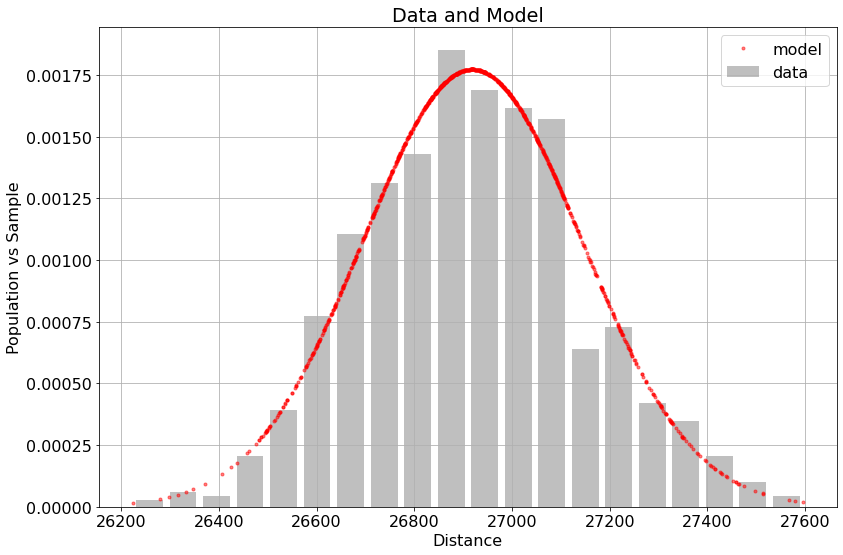

In [15]:
def gaussian_model(x, mu, sigma):
    return 1/(np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

def plot_data_and_model(data, model, opt_sort=False):
    data_bins = np.linspace(np.min(data), np.max(data), 21)
    data_opts = dict(rwidth=0.8, color='black', alpha=0.25)
    model_opts = dict(linewidth=4, color='red', alpha=0.5, linestyle=' ', marker="." )
    if opt_sort:
        # Note: Critical thing students get wrong a LOT!
        # By default, we turn off linestyle, which connects-the-dots in order
        # This is bad here, because the data and model are not sorted in order of increasing distance
        # Sorting only the data or only the model, by size, will break everything,
        # since the model and data are connected point-by-point, they both must be sorted together
        # Here we sort by data (distance)
        sort_indices = np.argsort(data)
        data = data[sort_indices]
        model = model[sort_indices]
        model_opts = dict(linewidth=4, color='red', alpha=0.5, linestyle='-', marker="." )
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(12,8))
    count, bins, patches = axis.hist(data, data_bins, density=True, cumulative=False, label='data', **data_opts)
    line = axis.plot(data, model, label='model', **model_opts)
    axis.grid()
    axis.set_ylabel("Population vs Sample")
    axis.set_xlabel("Distance")
    axis.legend()
    # title = axis.set_title('Guassian model, mu = {:0.1f}, sigma = {:0.1f}'.format(mu, sigma))
    title = axis.set_title('Data and Model')
    fig.tight_layout()
    plt.show()
    return fig

# Compute the mean and standard deviation of the sample_distances
sample_mean = np.mean(sample_distances)
sample_stdev = np.std(sample_distances)

# Use the sample mean and stdev as estimates of the population model parameters mu and sigma
population_model = gaussian_model(sample_distances, mu=sample_mean, sigma=sample_stdev)

# Plot the model and data to see how they compare
fig = plot_data_and_model(sample_distances, population_model)

Notice in the plot that the data and the model do not line up exactly. This is to be expected because the sample is just a subset of the population, and any model built from it cannot be a prefect representation of the population. Also notice the vertical axis: it shows the normalize data bin counts, and the probability density of the model. Think of that as probability-per-bin, so that if summed all the bins, the total would be 1.0.

### ***Maximizing Likelihood, Part 1***

Previously, we chose the sample mean as an estimate of the population model paramter `mu`. But how do we know that the sample mean is the best estimator? This is tricky, so let's do it in two parts.

In Part 1, you will use a computational approach to compute the log-likelihood of a given estimate. Then, in Part 2, we will see that when you compute the log-likelihood for many possible guess values of the estimate, one guess will result in the maximum likelihood.

* Compute the `mean()` and `std()` of the preloaded `sample_distances` as the guessed values of the probability model parameters.

* Compute the probability, for each distance, using `gaussian_model()` built from `sample_mean` and `sample_stdev`.

* Compute the loglikelihood as the `sum()` of the `log()` of the probabilities `probs`.

In [19]:
# Compute sample mean and stdev, for use as model parameter value guesses
mu_guess = np.mean(sample_distances)
sigma_guess = np.std(sample_distances)

# For each sample distance, compute the probability modeled by the parameter guesses
probs = np.zeros(len(sample_distances))
for n, distance in enumerate(sample_distances):
    probs[n] = gaussian_model(distance, mu=mu_guess, sigma=sigma_guess)

# Compute and print the log-likelihood as the sum() of the log() of the probabilities
loglikelihood = np.sum(np.log(probs))
print('For guesses mu={:0.2f} and sigma={:0.2f}, the loglikelihood={:,.2f}'.format(mu_guess, sigma_guess, loglikelihood))

For guesses mu=26918.39 and sigma=224.99, the loglikelihood=-6,834.98


Although the likelihood (the product of the probabilities) is easier to interpret, the loglikelihood has better numerical properties. Products of small and large numbers can cause numerical artifacts, but sum of the logs usually doesnt suffer those same artifacts, and the "sum(log(things))" is closely related to the "product(things)".

### ***Maximizing Likelihood, Part 2***

In Part 1, you computed a single log-likelihood for a single `mu`. In this Part 2, you will apply the predefined function `compute_loglikelihood()` to compute an array of log-likelihood values, one for each element in an array of possible `mu` values.

The goal then is to determine which single `mu` guess leads to the single maximum value of the `loglikelihood` array.

To get started, use the preloaded data `sample_distances`, `sample_mean`, `sample_stdev` and a helper function `compute_loglikelihood()`.


* Construct `mu_guesses` by taking values centered on sample_mean and spread by `sample_stdev`.

* For each guess value `mu_guess` in `mu_guesses`, use `compute_loglikelihood()` for all `sample_distances`, holding sigma fixed at `sample_stdev`.

* Find the maximum value in the loglikelihoods array and use its index to find the `best_mu` from our `mu_guesses`.

* Print the `best_mu` and visualize it by plotting the `loglikelihoods`.

Maximum loglikelihood found for best mu guess=26,918.39


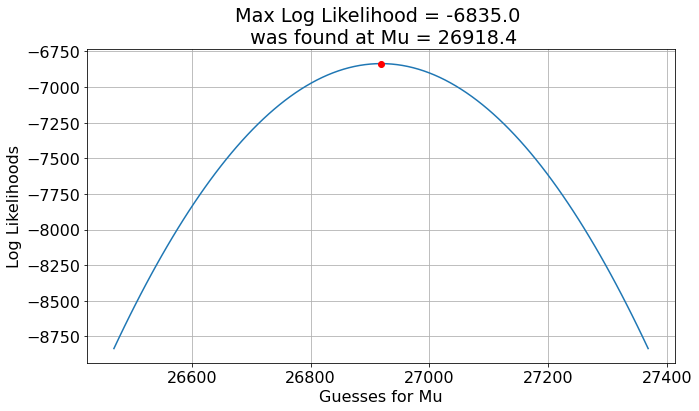

In [23]:
import numpy as np

def gaussian_model(x, mu, sigma):
    return 1/(np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

def compute_loglikelihood(samples, mu, sigma=250):
    probs = np.zeros(len(samples))
    for n, sample in enumerate(samples):
        probs[n] = gaussian_model(sample, mu, sigma)
    loglikelihood = np.sum(np.log(probs))
    return loglikelihood

def plot_loglikelihoods(mu_guesses, loglikelihoods):
    max_loglikelihood = np.max(loglikelihoods)
    max_index = np.where(loglikelihoods==max_loglikelihood)
    max_guess = mu_guesses[max_index][0]
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(10,6))
    axis.plot(mu_guesses, loglikelihoods)
    axis.plot(max_guess, max_loglikelihood, marker="o", color="red")
    axis.grid()
    axis.set_ylabel('Log Likelihoods')
    axis.set_xlabel('Guesses for Mu')
    axis.set_title('Max Log Likelihood = {:0.1f} \n was found at Mu = {:0.1f}'.format(max_loglikelihood, max_guess))
    fig.tight_layout()
    plt.show()
    return fig

# Create an array of mu guesses, centered on sample_mean, spread out +/- by sample_stdev
low_guess = sample_mean - 2*sample_stdev
high_guess = sample_mean + 2*sample_stdev
mu_guesses = np.linspace(low_guess, high_guess, 101)

# Compute the loglikelihood for each model created from each guess value
loglikelihoods = np.zeros(len(mu_guesses))
for n, mu_guess in enumerate(mu_guesses):
    loglikelihoods[n] = compute_loglikelihood(sample_distances, mu=mu_guess, sigma=sample_stdev)

# Find the best guess by using logical indexing, the print and plot the result
best_mu = mu_guesses[loglikelihoods==np.max(loglikelihoods)]
print('Maximum loglikelihood found for best mu guess={:,.2f}'.format(best_mu[0]))
fig = plot_loglikelihoods(mu_guesses, loglikelihoods)

Notice that the guess for `mu` that gave the maximum likelihood is precisely the same value as the `sample.mean()`. The `sample_mean` is thus said to be the "Maximum Likelihood Estimator" of the population mean `mu`. We call that value of `mu` the "Maximum Likelihood Estimator" of the population `mu` because, of all the `mu` values tested, it results in a model population with the greatest likelihood of producing the sample data we have.

# ***Population Unavailable***

* Usually, we only have a single sample, with ***no knowledge of the shape of the distribution*** from population.

### ***Bootstrap and Standard Error***

Use bootstrap resampling, computing one mean for each resample, to create a distribution of means, and then compute standard error as a way to quantify the "uncertainty" in the sample statistic as an estimator for the population statistic.

Use the preloaded `sample_data` array of 500 independent measurements of distance traveled. For now, this is a simulated data set to simplify this lesson.

* Assign the `sample_data` as the model for the population.

* Iterate `num_resamples` times:

* Use `np.random.choice()` each time to generate a `bootstrap_sample` of `size=resample_size` taken from the `population_model` and specify `replace=True`.

* Compute and store the sample mean each time.

* Compute and print the `np.mean()` and `np.std()` of `bootstrap_means`.

* Use the predefined `plot_data_hist()` and visualize the `bootstrap_means` distribution.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


Bootstrap Distribution: center=5.0, spread=0.2


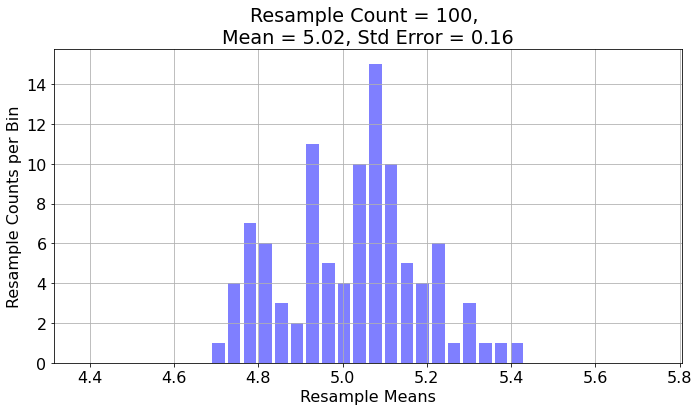

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import array

def plot_data_hist(y):
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(10,6))
    data_opts = dict(rwidth=0.8, color='blue', alpha=0.5)
    bin_range = np.max(y) - np.min(y)
    bin_edges = np.linspace(np.min(y), np.max(y), 21)
    plt.hist(y, bins=bin_edges, **data_opts)
    axis.set_xlim(np.min(y) - 0.5*bin_range, np.max(y) + 0.5*bin_range)
    axis.grid("on")
    axis.set_ylabel("Resample Counts per Bin")
    axis.set_xlabel("Resample Means")
    axis.set_title("Resample Count = {}, \nMean = {:0.2f}, Std Error = {:0.2f}".format(len(y), np.mean(y), np.std(y)))
    fig.tight_layout()
    plt.show()
    return fig

sample_data = array([ -2.56528602e-01,   1.33537708e+00,   3.10605971e+00,
        -3.88306749e-01,  -3.68273914e-01,   3.27842563e+00,
         1.67486946e+00,  -7.78948772e-01,   1.26512009e+00,
        -7.26835386e-01,  -7.11459507e-01,   7.23924543e-01,
        -3.56656049e+00,  -3.16983567e+00,  -8.24575058e-01,
        -1.70566224e+00,   9.68494665e-01,  -1.45604815e+00,
        -2.44460740e+00,   3.33129754e+00,  -3.15526010e-02,
         5.75056409e-01,  -2.38949637e+00,  -6.08765449e-01,
         7.21845179e-01,  -1.78198715e+00,   1.29139604e+00,
        -6.41277380e-01,  -3.38749959e-03,  -6.03413224e-01,
         4.32455637e+00,   6.13005551e-01,  -1.45542186e+00,
         2.32508982e+00,  -1.74168730e+00,   1.13772719e+00,
        -3.17934025e+00,  -1.89637210e+00,   1.17372247e+00,
         2.27693316e+00,   1.16273656e+00,   6.08703435e-01,
         2.57792609e-01,  -2.07704398e+00,  -5.39688417e-01,
        -1.27754192e-03,   3.05424445e+00,   1.64723658e+00,
        -2.54608031e+00,   1.64816794e+00,   2.49835439e-01,
        -3.13844001e-01,   2.28335258e+00,   3.14199904e+00,
         2.96256024e+00,  -5.58435046e-01,   5.21575248e-01,
         1.82252686e+00,   3.13109025e+00,   2.41651524e-01,
         8.48682047e-01,  -9.72669948e-01,  -1.13241325e+00,
         2.90505164e+00,   4.01248006e+00,   1.17597976e+00,
         3.34706580e+00,   2.08327205e+00,   8.97604908e-02,
         2.12279121e+00,   4.49607313e+00,   1.36834792e+00,
         4.58928731e+00,  -3.75949021e+00,   3.14380501e+00,
         1.69409414e+00,   9.41985299e-01,   1.74352155e+00,
        -2.39513783e+00,   1.16065622e+00,   2.33422514e+00,
         4.59578809e+00,   6.23459563e-01,   6.30127942e-02,
         6.96485913e-01,   3.55080424e+00,   2.39750222e+00,
         7.00479592e-01,   2.80653487e+00,   1.99415510e+00,
         3.75728998e+00,   4.35893812e-01,   1.20467571e+00,
         1.09578369e+00,  -1.02702990e+00,   2.51224055e+00,
         2.46211054e+00,   1.97022691e+00,   1.51082573e+00,
        -8.30741484e-01,   1.17870935e+00,   1.35457097e+00,
         4.55445462e-01,   1.75742858e+00,   2.90810171e+00,
         5.89237180e+00,   2.48915563e+00,   2.67510078e+00,
         2.03110817e+00,  -1.63754243e+00,   2.16697225e+00,
         2.36046042e+00,   7.18648422e+00,   1.89527807e+00,
         2.90309468e+00,   2.25057646e+00,   2.64392476e-03,
         4.64564563e+00,   3.88386607e+00,   3.98206389e+00,
         6.01225090e-01,   5.24558862e+00,  -3.43702126e-01,
         3.65371419e+00,   6.88091125e+00,   5.38927350e-01,
         1.40740454e+00,   2.75930273e+00,   1.57304869e+00,
        -5.01326862e-01,   2.75712595e+00,   5.15392573e-01,
         3.60718486e+00,   8.41151532e-01,   5.79986881e+00,
         1.15349342e+00,   2.09587697e+00,   4.38703443e+00,
         3.18271367e-01,   3.25491987e+00,   5.43428551e+00,
        -3.74966469e-01,   3.22926772e+00,   3.39976559e+00,
         4.46364574e+00,   4.46098578e-01,   2.99086774e-01,
         4.00388313e+00,   3.57396935e+00,   3.50098570e+00,
         3.71289642e+00,   1.67995056e+00,   3.52450739e+00,
         3.66614495e+00,   1.67129716e+00,   6.85154902e+00,
         4.08766584e+00,   7.77393006e-01,   4.49310722e+00,
         1.25063666e+00,   4.79416921e+00,   5.55719116e+00,
         1.61863536e+00,   5.20675226e+00,   4.12556185e+00,
         4.96412032e+00,   7.13358597e+00,   2.86922377e+00,
         1.87252767e+00,   1.62097114e+00,   1.78837943e+00,
         3.28579658e+00,   4.14230395e+00,   4.03338160e+00,
         5.15436650e+00,   3.54600378e+00,   6.44706815e+00,
         3.03068633e+00,   9.02033833e+00,   4.85133470e+00,
         1.90568489e+00,   1.49821500e+00,   4.62494483e+00,
         3.23307443e+00,   5.12800099e+00,   4.66647525e+00,
         3.59434217e+00,   2.06641256e+00,   7.50305551e-01,
         2.90697010e+00,   5.53279759e+00,   4.26818749e+00,
         1.36852244e+00,   4.22636185e+00,   4.67063476e+00,
         2.15228513e+00,   4.24745021e+00,   4.07641744e+00,
         1.69405940e+00,   4.71557472e+00,   5.14156905e+00,
         6.20610249e+00,   6.16760410e+00,   1.32466126e+00,
         2.22434992e+00,   5.15007053e+00,   5.16757190e+00,
         5.19009537e+00,   1.18854630e+01,   5.34178102e+00,
         6.49113128e+00,   6.14800353e+00,   5.56278250e+00,
         3.64946151e+00,   5.81793844e+00,   2.77434957e+00,
         3.86636279e+00,   3.38927290e+00,   4.54374828e+00,
         9.02931713e+00,   6.85469615e-01,   5.81252038e+00,
         1.23456826e+00,   3.53613627e+00,   6.67790119e+00,
         4.64856004e+00,   2.38451044e+00,   3.12939258e+00,
         5.93919550e+00,   3.13926674e+00,   5.05291718e+00,
         4.73114368e+00,   3.35679930e+00,   8.96788818e+00,
         5.96783804e+00,   6.69714827e-01,   5.11290863e+00,
         3.43642707e+00,   6.48486667e+00,   3.21495852e+00,
         4.59052712e+00,   5.84997456e+00,   6.59151039e+00,
         2.47940719e+00,   4.23099753e+00,   3.97010938e+00,
         3.63334153e+00,   8.49090848e+00,   5.78996342e+00,
         2.47823209e+00,   6.85572389e+00,   9.28431239e+00,
         7.12493052e+00,   2.04126007e+00,   4.13153185e+00,
         7.65382230e+00,   3.72466107e+00,   6.04763886e+00,
         6.72926811e+00,   3.34613906e+00,   5.10094929e+00,
        -1.24253468e+00,   3.21122472e+00,   4.77486370e+00,
         2.80443364e+00,   8.58482261e+00,   2.47971724e+00,
         4.47991103e+00,   5.64148115e+00,   8.28254658e+00,
         2.54827570e+00,   7.76632750e+00,   5.48046612e+00,
         3.51698270e+00,   6.42420695e+00,   5.91811939e+00,
         4.33956625e+00,   5.69960417e+00,   4.80937281e+00,
         5.82703469e+00,   6.94426135e+00,   8.81203363e+00,
         3.18436900e+00,   9.94606675e+00,   1.79582440e+00,
         5.41642981e+00,   6.91663441e+00,   6.32198374e+00,
         4.53460096e+00,   5.38375550e+00,   4.83399813e+00,
         4.66127049e+00,   7.55920419e+00,   6.59403097e+00,
         4.51418081e+00,   7.71919975e+00,   6.55459904e+00,
         7.58572424e+00,   7.23925768e+00,   4.34200998e+00,
         4.89963792e+00,   7.53458721e+00,   7.28074053e+00,
         6.03819681e+00,   6.33465477e+00,   8.67532979e+00,
         4.95685722e+00,   7.25419476e+00,   5.77561470e+00,
         5.76463759e+00,   8.41755370e+00,   7.89083270e+00,
         7.88701927e+00,   8.89095761e+00,   6.34200768e+00,
         7.68390594e+00,   5.71946649e+00,   7.00833270e+00,
         6.11971389e+00,   6.59399193e+00,   7.61031405e+00,
         4.80355863e+00,   1.06447746e+01,   4.46796524e+00,
         4.07162277e+00,   8.83622175e+00,   8.12332539e+00,
         7.80823963e+00,   7.83669102e+00,   6.57550645e+00,
         4.82549126e+00,   6.79160912e+00,   5.30567658e+00,
         8.63023947e+00,   6.40588524e+00,   5.06900561e+00,
         6.09722832e+00,   7.58586291e+00,   5.65255089e+00,
         5.15555921e+00,   7.30737442e+00,   7.32993314e+00,
         5.84611365e+00,   5.93792339e+00,   7.36409987e+00,
         4.02383132e+00,   4.12507245e+00,   5.52311156e+00,
         6.55310570e+00,   7.62181513e+00,   9.97071243e+00,
         8.75531925e+00,   6.74012294e+00,   7.04196758e+00,
         5.09494127e+00,   7.08297373e+00,   6.56268272e+00,
         7.80543712e+00,   5.52553811e+00,   8.23869303e+00,
         1.02854778e+01,   7.02247970e+00,   8.06342344e+00,
         8.66028798e+00,   6.49755906e+00,   7.76818496e+00,
         7.36518480e+00,   7.55535220e+00,   5.83398043e+00,
         7.44902035e+00,   8.41599658e+00,   1.03422872e+01,
         9.37854165e+00,   1.17863649e+01,   5.96530487e+00,
         9.26464127e+00,   7.90668401e+00,   1.19396059e+01,
         5.96340343e+00,   5.92055632e+00,   6.42121471e+00,
         3.39220855e+00,   6.60848996e+00,   6.16173468e+00,
         8.00078757e+00,   8.40351195e+00,   1.14923417e+01,
         9.66084768e+00,   6.62619269e+00,   6.00317066e+00,
         8.80383834e+00,   5.19953359e+00,   1.15229175e+01,
         1.02388802e+01,   6.96164870e+00,   4.49373094e+00,
         1.06477447e+01,   7.73092031e+00,   1.04556326e+01,
         4.81114468e+00,   6.82124995e+00,   8.05048740e+00,
         8.15396119e+00,   7.17986906e+00,   9.34569986e+00,
         5.98475914e+00,   7.85524103e+00,   8.40059126e+00,
         9.20887767e+00,   9.62322976e+00,   5.97071582e+00,
         5.17177166e+00,   1.08153536e+01,   8.94462802e+00,
         6.80302693e+00,   1.14223040e+01,   8.57134927e+00,
         1.07185944e+01,   8.51503696e+00,   1.25214958e+01,
         1.19306817e+01,   7.94207170e+00,   1.04031419e+01,
         9.77075190e+00,   1.12372631e+01,   6.59015308e+00,
         9.91210292e+00,   1.06768490e+01,   5.06252103e+00,
         6.23348297e+00,   4.54153564e+00,   8.10118633e+00,
         1.00950845e+01,   1.16847141e+01,   8.84818956e+00,
         1.19772311e+01,   5.97979708e+00,   5.35323512e+00,
         8.66890460e+00,   9.56813090e+00,   8.75461050e+00,
         4.70511580e+00,   8.68175992e+00,   6.27106100e+00,
         1.02393451e+01,   9.65319649e+00,   7.06024043e+00,
         7.93226617e+00,   6.86157296e+00,   8.87464181e+00,
         1.09302846e+01,   7.06854791e+00,   1.00680930e+01,
         8.01948476e+00,   7.51425434e+00,   8.90593928e+00,
         7.06951536e+00,   8.05270139e+00,   6.78424421e+00,
         1.31294503e+01,   9.29052710e+00,   7.84054898e+00,
         9.68795982e+00,   9.05534390e+00,   8.85806080e+00,
         1.05483334e+01,   1.08550154e+01,   8.29899770e+00,
         8.22836352e+00,   8.84989661e+00,   4.81615767e+00,
         6.40961788e+00,   1.21937485e+01,   1.27699354e+01,
         9.00192792e+00,   1.06731139e+01,   1.01625003e+01,
         1.57177616e+01,   1.18191498e+01,   9.34416482e+00,
         7.70891912e+00,   6.42710736e+00,   1.00669273e+01,
         8.16729851e+00,   6.85549258e+00,   8.42685423e+00,
         7.57690399e+00,   1.31342833e+01,   1.15432795e+01,
         9.78405472e+00,   1.27798883e+01,   9.99473662e+00,
         8.13743160e+00,   1.29262482e+01,   1.09778201e+01,
         7.84550769e+00,   9.55932264e+00,   8.20876349e+00,
         7.21440054e+00])

num_resamples, resample_size = 100, 500
bootstrap_means = np.zeros(num_resamples)

# Use the sample_data as a model for the population
population_model = sample_data

# Resample the population_model 100 times, computing the mean each sample
for nr in range(num_resamples):
    bootstrap_sample = np.random.choice(population_model, size=resample_size, replace=True)
    bootstrap_means[nr] = np.mean(bootstrap_sample)

# Compute and print the mean, stdev of the resample distribution of means
distribution_mean = np.mean(bootstrap_means)
standard_error = np.std(bootstrap_means)
print('Bootstrap Distribution: center={:0.1f}, spread={:0.1f}'.format(distribution_mean, standard_error))

# Plot the bootstrap resample distribution of means
fig = plot_data_hist(bootstrap_means)

Notice that `standard_error` is just one measure of spread of the distribution of bootstrap resample means. You could have computed the `confidence_interval` using `np.percentile(bootstrap_means, 0.95)` and `np.percentile(bootstrap_means, 0.05)` to find the range distance values containing the inner 90% of the distribution of means.

### ***Estimating Speed and Confidence***

Let's continue looking at the National Park hiking data. Notice that some distances are negative because they walked in the opposite direction from the trail head; the data are messy so let's just focus on the overall trend.

In this exercise, you goal is to use bootstrap resampling to find the distribution of speed values for a linear model, and then from that distribution, compute the best estimate for the speed and the 90th percent confidence interval of that estimate. The speed here is the slope parameter from the linear regression model to fit distance as a function of time.

To get you started, we've preloaded `distance` and `time` data, together with a pre-defined `least_squares()` function to compute the speed value for each resample.

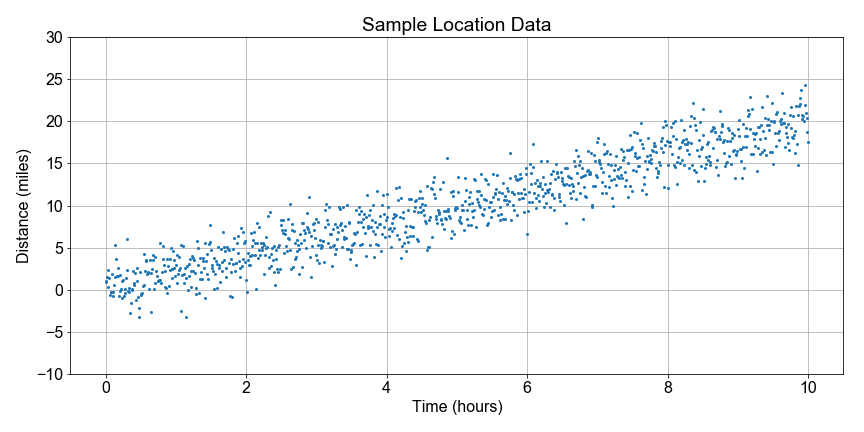

* Use `np.random.choice()` to draw `sample_inds` from `population_inds`, preserving the distance-time pairing of each datum.

* To preserve time ordering, `.sort()` the `sample_inds`, and then use `sample_inds` to index `distances` and `times`.

* Use `least_squares(times, distances)` to compute linear model parameters and store `a1` in `resample_speeds`.

* Apply `np.mean()` and `np.percentiles()` to `resample_speeds`, computing speed and confidence interval `ci_90`, and then print both.

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd

def least_squares(x, y):
    x_mean = np.sum(x)/len(x)
    y_mean = np.sum(y)/len(y)
    x_dev = x - x_mean
    y_dev = y - y_mean
    a1 = np.sum(x_dev * y_dev) / np.sum( np.square(x_dev) )
    a0 = y_mean - (a1 * x_mean)
    return a0, a1

# Resample each preloaded population, and compute speed distribution
population_inds = np.arange(0, 99, dtype=int)
for nr in range(num_resamples):
    sample_inds = np.random.choice(population_inds, size=100, replace=True)
    sample_inds.sort()
    sample_distances = distances[sample_inds]
    sample_times = times[sample_inds]
    a0, a1 = least_squares(sample_times, sample_distances)
    resample_speeds[nr] = a1

# Compute effect size and confidence interval, and print
speed_estimate = np.mean(resample_speeds)
ci_90 = np.percentile(resample_speeds, [5, 95])
print('Speed Estimate = {:0.2f}, 90% Confidence Interval: {:0.2f}, {:0.2f} '.format(speed_estimate, ci_90[0], ci_90[1]))



```
 Speed Estimate = 2.29, 90% Confidence Interval: 1.23, 3.35 
```

Notice that the speed estimate (the mean) falls inside the confidence interval (the 5th and 95th percentiles). Moreover, notice if you computed the standard error, it would also fit inside the confidence interval. Think of the standard error here as the 'one sigma' confidence interval. Note that this should be very similar to the summary output of a statsmodels ols() linear regression model, but here you can compute arbitrary percentiles because you have the entire speeds distribution.

### ***Visualize the Bootstrap***

Continuing where we left off earlier in this lesson, let's visualize the bootstrap distribution of speeds estimated using bootstrap resampling, where we computed a least-squares fit to the slope for every sample to test the variation or uncertainty in our slope estimation.

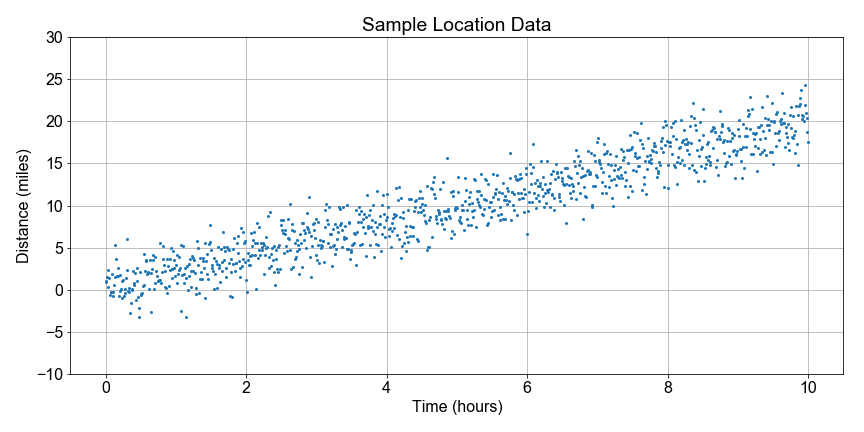

To get you started, we've preloaded a function `compute_resample_speeds(distances, times)` to do the computation of generate the speed sample distribution.

* Use the pre-defined `compute_resample_speeds(distances, times)` to compute the `resample_speeds`.

* Use `np.mean()` to compute the `speed_estimate` from the `resample_speeds`.

* Use `np.percentile()` with `[5, 95]` to compute the percentiles of `resample_speeds`, which define the confidence interval boundaries.

* Use `axis.hist()` to plot the `resample_speeds`, specifying the bins with `hist_bin_edges`.

* Using `axis.axvline`, specify the correct two indices of percentiles to mark the confidence interval boundaries on the chart.



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd

def compute_resample_speeds(distances, times):
    num_resamples = 1000
    population_inds = np.arange(0, 99, dtype=int)
    resample_speeds = np.zeros(num_resamples)
    for nr in range(num_resamples):
        sample_inds = np.random.choice(population_inds, size=100, replace=True)
        sample_inds.sort()
        sample_distances = distances[sample_inds]
        sample_times = times[sample_inds]
        a0, a1 = least_squares(sample_times, sample_distances)
        resample_speeds[nr] = a1	
    return resample_speeds

# Create the bootstrap distribution of speeds
resample_speeds = compute_resample_speeds(distances, times)
speed_estimate = np.mean(resample_speeds)
percentiles = np.percentile(resample_speeds, [5, 95])

# Plot the histogram with the estimate and confidence interval
fig, axis = plt.subplots()
hist_bin_edges = np.linspace(0.0, 4.0, 21)
axis.hist(resample_speeds, bins=hist_bin_edges, color='green', alpha=0.35, rwidth=0.8)
axis.axvline(speed_estimate, label='Estimate', color='black')
axis.axvline(percentiles[0], label=' 5th', color='blue')
axis.axvline(percentiles[1], label='95th', color='blue')
axis.legend()
plt.show()

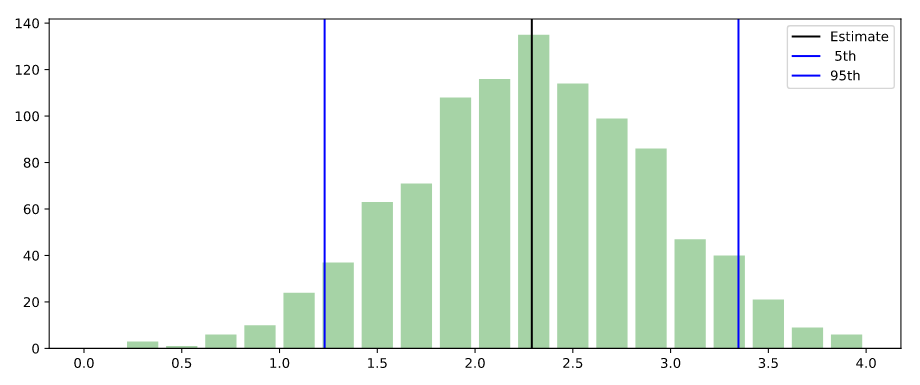

Notice that vertical lines marking the 5th (left) and 95th (right) percentiles mark the extent of the confidence interval, while the speed estimate (center line) is the mean of the distribution and falls between them. Note the speed estimate is the mean, not the median, which would be 50% percentile.

9.739250078382423


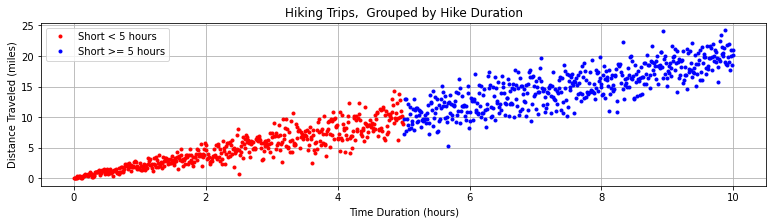

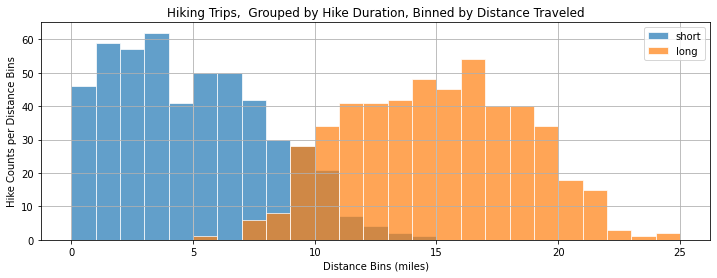

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd

df = pd.read_csv('hiking_data.csv')
sample_distances, times = df['distance'], df['time']

# Group into early and late times
group_short = sample_distances[times < 5]
group_long = sample_distances[times >= 5]

# Resample distributions
resample_short = np.random.choice(group_short, size=500, replace=True)
resample_long = np.random.choice(group_long, size=500, replace=True)

# Test Statistic
test_statistic = resample_long - resample_short

# Effect size as mean of test statistic distribution
effect_size = np.mean(test_statistic)
print(effect_size)

plt.figure(figsize=(13, 3))
plt.plot(times[times < 5], group_short, marker='.', linestyle='none', color='red', label='Short < 5 hours')
plt.plot(times[times >= 5], group_long, marker='.', linestyle='none', color='blue', label='Short >= 5 hours')
plt.grid()
plt.xlabel('Time Duration (hours)')
plt.ylabel('Distance Traveled (miles)')
plt.title('Hiking Trips,  Grouped by Hike Duration')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.hist(group_short, bins=np.arange(0, 26), edgecolor='white', alpha=0.7)
plt.hist(group_long, bins=np.arange(0, 26), edgecolor='white', alpha=0.7)
plt.grid()
plt.xlabel('Distance Bins (miles)')
plt.ylabel('Hike Counts per Distance Bins')
plt.title('Hiking Trips,  Grouped by Hike Duration, Binned by Distance Traveled')
plt.legend(('short', 'long'))
plt.show()

# ***Shuffle and Split***


0.2401176111036962


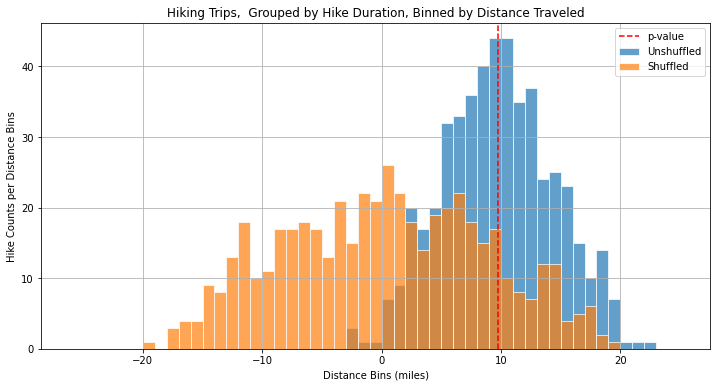

In [34]:
# Concatenate and Shuffle
shuffle_bucket = np.concatenate((group_short, group_long))
np.random.shuffle(shuffle_bucket)

# Split in the middle
slice_index = len(shuffle_bucket)//2
shuffled_half1 = shuffle_bucket[0:slice_index]
shuffled_half2 = shuffle_bucket[slice_index+1:]

# Resample shuffled populations
shuffled_sample1 = np.random.choice(shuffled_half1, size=500, replace=True)
shuffled_sample2 = np.random.choice(shuffled_half2, size=500, replace=True)

# Recompute effect size
shuffled_test_statistic = shuffled_sample2 - shuffled_sample1
effect_size = np.mean(shuffled_test_statistic)
print(effect_size)

plt.figure(figsize=(12, 6))
plt.hist(test_statistic, bins=np.arange(-26, 26), edgecolor='white', alpha=0.7)
plt.hist(shuffled_test_statistic, bins=np.arange(-26, 26), edgecolor='white', alpha=0.7)
plt.axvline(x=9.739250078382423, color='red', linestyle='--')
plt.grid()
plt.xlabel('Distance Bins (miles)')
plt.ylabel('Hike Counts per Distance Bins')
plt.title('Hiking Trips,  Grouped by Hike Duration, Binned by Distance Traveled')
plt.legend(('p-value', 'Unshuffled', 'Shuffled'))
plt.show()

### ***Test Statistics and Effect Size***

How can we explore linear relationships with bootstrap resampling? Back to the trail! For each hike plotted as one point, we can see that there is a linear relationship between total distance traveled and time elapsed. It we treat the distance traveled as an "effect" of time elapsed, then we can explore the underlying connection between linear regression and statistical inference.

In this exercise, you will separate the data into two populations, or "categories": early times and late times. Then you will look at the ***differences*** between the total distance traveled within each population. This difference will serve as a ***"test statistic"***, and it's distribution will test the effect of separating distances by times.

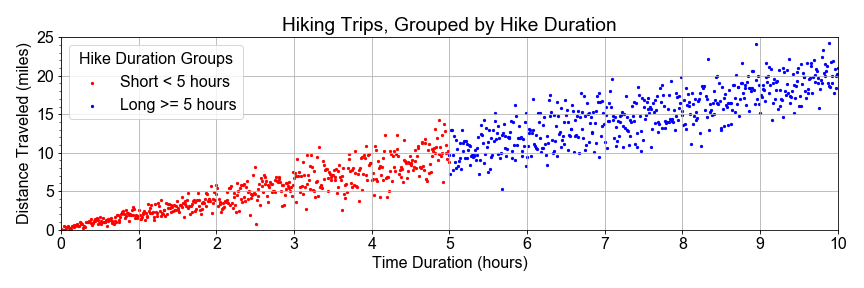

* Use numpy "logical indexing", e.g. `sample_distances[sample_times < 5]`, to separate the sample `distances` into early and late time populations.

* Use `np.random.choice()` with `replacement=True` to create a resample for each of the two time bins.

* Compute the `test_statistic` array as the `resample_long - resample_short`, and find and print the effect size and uncertainty with `np.mean()`, `np.std()`.

* Plot the `test_statistic` distribution, using the predefined `fig = plot_test_statistic()`.

Test Statistic: mean=9.68, stdev=4.66


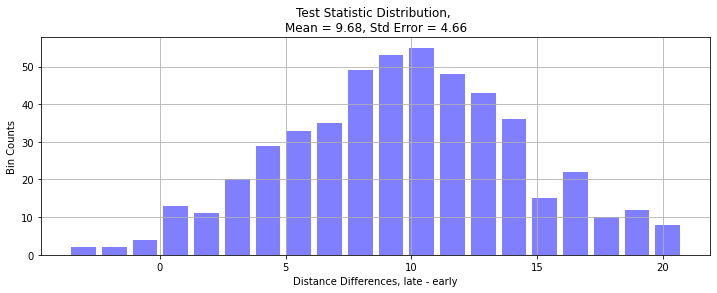

In [35]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd

df = pd.read_csv('hiking_data.csv')
sample_distances, sample_times = df['distance'], df['time']

def plot_test_statistic(test_statistic):
    """
    Purpose: Plot the test statistic array as a histogram
    Args:
        test_statistic (np.array): an array of test statistic values, e.g. resample2 - resample1
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    t_mean = np.mean(test_statistic)
    t_std = np.std(test_statistic)
    t_min = np.min(test_statistic)
    t_max = np.max(test_statistic)
    bin_edges = np.linspace(t_min, t_max, 21)
    data_opts = dict(rwidth=0.8, color='blue', alpha=0.5)
    fig, axis = plt.subplots(figsize=(12,4))
    plt.hist(test_statistic, bins=bin_edges, **data_opts)
    axis.grid()
    axis.set_ylabel("Bin Counts")
    axis.set_xlabel("Distance Differences, late - early")
    title_form = "Test Statistic Distribution, \nMean = {:0.2f}, Std Error = {:0.2f}"
    axis.set_title(title_form.format(t_mean, t_std))
    plt.show()
    return fig

# Create two poulations, sample_distances for early and late sample_times.
# Then resample with replacement, taking 500 random draws from each population.
group_duration_short = sample_distances[sample_times < 5]
group_duration_long = sample_distances[sample_times > 5]
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)

# Difference the resamples to compute a test statistic distribution, then compute its mean and stdev
test_statistic = resample_long - resample_short
effect_size = np.mean(test_statistic)
standard_error = np.std(test_statistic)

# Print and plot the results
print('Test Statistic: mean={:0.2f}, stdev={:0.2f}'.format(effect_size, standard_error))
fig = plot_test_statistic(test_statistic)

Notice again, the test statistic is the *difference* between a distance drawn from short duration trips and one drawn from long duration trips. The distribution of difference values is built up from differencing each point in the early time range with one from the late time range. The mean of the test statistic is not zero and tells us that there is on average a difference in distance traveled when comparing short and long duration trips. Again, we call this the *'effect size'*. The time increase had an effect on distance traveled. The standard error of the test statistic distribution is not zero, so there is some spread in that distribution, or put another way, uncertainty in the size of the effect.

### ***Null Hypothesis***

In this exercise, we formulate the null hypothesis as

* *short and long time durations have no effect on total distance traveled.*

We interpret the "zero effect size" to mean that 

* if we shuffled samples between short and long times, so that two new samples each have a mix of short and long duration trips, and then compute the test statistic, on average it will be zero.

In this exercise, your goal is to perform the shuffling and resampling. Start with the predefined `group_duration_short` and `group_duration_long` which are the un-shuffled time duration groups.

* Use `np.concatenate()` to combine the two populations, and then use `np.random.shuffle()` to shuffle the values inside that container.

* Slice the `shuffle_bucket` in half and use `np.random.choice()` to resample each `shuffle_half`.

* Compute the `test_statistic` by subtracting `resample_half1` from `resample_half2`.

* Compute the `effect_size` as the `np.mean()` of the `test_statistic`, and print the result.

In [38]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd

df = pd.read_csv('hiking_data.csv')
sample_distances, sample_times = df['distance'], df['time']
group_duration_short = sample_distances[sample_times < 5]
group_duration_long = sample_distances[sample_times >= 5]

# Shuffle the time-ordered distances, then slice the result into two populations.
shuffle_bucket = np.concatenate((group_duration_short, group_duration_long))
np.random.shuffle(shuffle_bucket)
slice_index = len(shuffle_bucket)//2
shuffled_half1 = shuffle_bucket[0:slice_index]
shuffled_half2 = shuffle_bucket[slice_index:]

# Create new samples from each shuffled population, and compute the test statistic
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic = resample_half2 - resample_half1

# Compute and print the effect size
effect_size = np.mean(test_statistic)
print('Test Statistic, after shuffling, mean = {}'.format(effect_size))

Test Statistic, after shuffling, mean = 0.22692738519544722


Notice that your effect size is not exactly zero because there is noise in the data. But the effect size is much closer to zero than before shuffling. Notice that if you rerun your code, which will generate a new shuffle, you will get slightly different results each time for the effect size, but `np.abs(test_statistic)` should be less than about 1.0, due to the noise, as opposed to the slope, which was about 2.0.

### ***Visualizing Test Statistics***

In this exercise, you will approach the null hypothesis by comparing the distribution of a test statistic arrived at from two different ways.

First, you will examine two "populations", grouped by early and late times, and computing the test statistic distribution. Second, shuffle the two populations, so the data is no longer time ordered, and each has a mix of early and late times, and then recompute the test statistic distribution.

To get you started, we've pre-loaded the two time duration groups, `group_duration_short` and `group_duration_long`, and two functions, `shuffle_and_split()` and `plot_test_statistic()`.

* Use `np.random.choice()` to resample `group_duration_short` and `group_duration_long`, and difference the resamples to compute the `test_statistic_unshuffled`.

* Use `shuffle_and_split()` on the original `group_duration_short` and `group_duration_long` (specified in this order) to create two new mixed populations.

* Resample the shuffled populations, and subtract `resample_short` from `resample_long` to compute a new `test_statistic_shuffled`.

* Use `plot_test_statistic()` to plot both test statistic distributions, and compare visually.

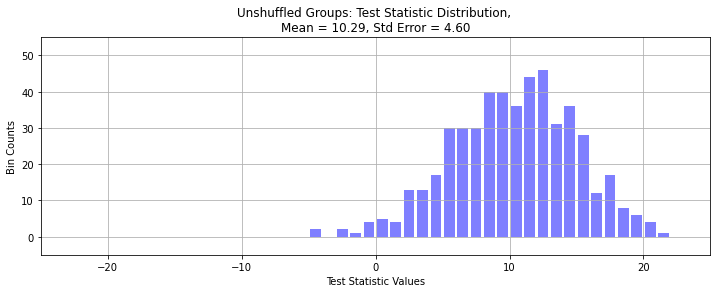

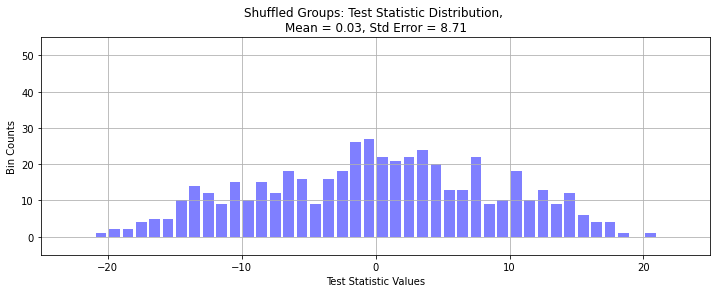

In [39]:
def shuffle_and_split(sample1, sample2):
    shuffled = np.concatenate((sample1, sample2))
    np.random.shuffle( shuffled )
    half_length = len(shuffled)//2
    sample1 = shuffled[0:half_length]
    sample2 = shuffled[half_length+1:]
    return sample1, sample2

def plot_test_statistic(test_statistic, label=''):
    t_mean = np.mean(test_statistic)
    t_std = np.std(test_statistic)
    t_min = np.min(test_statistic)
    t_max = np.max(test_statistic)
    # bin_edges = np.linspace(t_min, t_max, 21)
    bin_edges = np.linspace(-25, 25, 51)
    data_opts = dict(rwidth=0.8, color='blue', alpha=0.5)
    fig, axis = plt.subplots(figsize=(12,4))
    plt.hist(test_statistic, bins=bin_edges, **data_opts)
    axis.grid()
    axis.set_ylim(-5, +55)
    axis.set_xlim(-25, +25)
    axis.set_ylabel("Bin Counts")
    axis.set_xlabel("Test Statistic Values".format(label))
    title_form = "{} Groups: Test Statistic Distribution, \nMean = {:0.2f}, Std Error = {:0.2f}"
    axis.set_title(title_form.format(label, t_mean, t_std))
    plt.show()
    return fig

# From the unshuffled groups, compute the test statistic distribution
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)
test_statistic_unshuffled = resample_long - resample_short

# Shuffle two populations, cut in half, and recompute the test statistic
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic_shuffled = resample_half2 - resample_half1

# Plot both the unshuffled and shuffled results and compare
fig = plot_test_statistic(test_statistic_unshuffled, label='Unshuffled')
fig = plot_test_statistic(test_statistic_shuffled, label='Shuffled')

Notice that after you shuffle, the effect size went almost to zero and the spread increased, as measured by the standard deviation of the sample statistic, aka the 'standard error'. So shuffling did indeed have an effect. The null hypothesis is disproven. Time ordering does in fact have a non-zero effect on distance traveled. Distance is correlated to time.

### ***Visualizing the P-Value***

In this exercise, you will visualize the p-value, the chance that the effect (or "speed") we estimated, was the result of random variation in the sample. Your goal is to visualize this as the fraction of points in the shuffled test statistic distribution that fall to the right of the mean of the test statistic ("effect size") computed from the unshuffled samples.

To get you started, we've preloaded the `group_duration_short` and `group_duration_long` and functions `compute_test_statistic()`, `shuffle_and_split()`, and `plot_test_statistic_effect()`

* Use `compute_test_statistic()` to get `test_statistic_unshuffled` from the `group_duration_short` and `group_duration_long`; then use `np.mean()` to compute effect size.

* Use `shuffle_and_split()` to create `shuffle_half1` and `shuffle_half2`, and use `compute_test_statistic()` to compute the `test_statistic_shuffled`.

* Create a boolean mask condition `test_statistic_shuffled` values are greater than or equal to `effect_size`, then use this mask to compute the `p_value`.

* Print the `p_value` and plot both test statistics using `plot_test_stats_and_pvalue()`.

The p-value is = 0.178


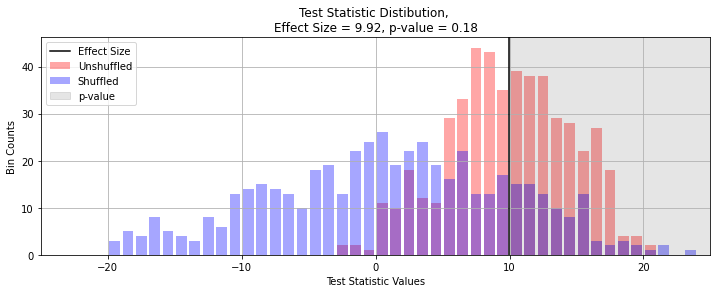

In [40]:
def compute_test_statistic(sample1, sample2):
    resample1 = np.random.choice(sample1, size=500, replace=True)
    resample2 = np.random.choice(sample2, size=500, replace=True)
    test_statistic = resample2 - resample1
    return test_statistic

def shuffle_and_split(sample1, sample2):
    shuffled = np.concatenate((sample1, sample2))
    np.random.shuffle( shuffled )
    half_length = len(shuffled)//2
    sample1 = shuffled[0:half_length]
    sample2 = shuffled[half_length+1:]
    return sample1, sample2

def plot_test_stats_and_pvalue(test_statistic, shuffle_statistic):
    """
    Purpose: Plot the test statistic array as a histogram
    Args:
        test_statistic (np.array): an array of test statistic values, e.g. resample2 - resample1
        shuffle_statistic (np.array): an array of test statistic values, from shuffled resamples
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    t_mean = np.mean(test_statistic)
    t_std = np.std(test_statistic)
    t_min = np.min(test_statistic)
    t_max = np.max(test_statistic)
    effect_size = np.mean(test_statistic)
    p_value = len(shuffle_statistic[shuffle_statistic>=effect_size])/len(shuffle_statistic)
    # bin_edges = np.linspace(t_min, t_max, 21)
    bin_edges = np.linspace(-25, 25, 51)
    shuffle_opts = dict(rwidth=0.8, color='blue', alpha=0.35, label='Shuffled')
    test_opts = dict(rwidth=0.8, color='red', alpha=0.35, label='Unshuffled')
    fig, axis = plt.subplots(figsize=(12,4))
    plt.hist(test_statistic, bins=bin_edges, **test_opts)
    plt.hist(shuffle_statistic, bins=bin_edges, **shuffle_opts)
    axis.axvline(effect_size, color='black', label='Effect Size')
    axis.axvspan(effect_size, +25, alpha=0.10, color='black', label='p-value')
    axis.grid()
    # axis.set_ylim(-5, +55)
    axis.set_xlim(-25, +25)
    axis.set_ylabel("Bin Counts")
    axis.set_xlabel("Test Statistic Values")
    title_form = ("Test Statistic Distibution, \n"
                  "Effect Size = {:0.2f}, p-value = {:0.02f}")
    axis.set_title(title_form.format(effect_size, p_value))
    axis.legend(loc='upper left')
    plt.show()
    return fig

# Compute the test stat distribution and effect size for two population groups
test_statistic_unshuffled = compute_test_statistic(group_duration_short, group_duration_long)
effect_size = np.mean(test_statistic_unshuffled)

# Randomize the two populations, and recompute the test stat distribution
shuffled_half1, shuffle_half2 = shuffle_and_split(group_duration_short, group_duration_long)
test_statistic_shuffled = compute_test_statistic(shuffled_half1, shuffle_half2)

# Compute the p-value as the proportion of shuffled test stat values >= the effect size
condition = test_statistic_shuffled >= effect_size
p_value = len(test_statistic_shuffled[condition]) / len(test_statistic_shuffled)

# Print p-value and overplot the shuffled and unshuffled test statistic distributions
print("The p-value is = {}".format(p_value))
fig = plot_test_stats_and_pvalue(test_statistic_unshuffled, test_statistic_shuffled)

Note that the entire point of this is compute a p-value to quantify the chance that our estimate for speed could have been obtained by random chance. On the plot, the unshuffle test stats are the distribution of speed values estimated from time-ordered distances. The shuffled test stats are the distribution of speed values computed from randomizing unordered distances. Values of the shuffled stats to the right of the mean non-shuffled effect size line are those that both (1) could have both occured randomly and (2) are at least as big as the estimate you want to use for speed.